In [2]:
#import the package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model 

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer

# Importing classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import linear_model 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# Importing required packages for visualization
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#- import class imbalanced packages
from imblearn import over_sampling 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier


# Importing XGBoost library
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
dfTrace = pd.read_csv('/Users/rparama/Downloads/Dataset/EtherClusterV2.csv')
dfTrace.head()

token_name  receipt_status  Contract_is_erc20  trace_from_address  \
0  Gastoken.io               0                  0                   4   
1  Gastoken.io               0                  0                   4   
2  Gastoken.io               0                  0                   4   
3  Gastoken.io               1                  0                   4   
4  Gastoken.io               1                  0                   4   

   trace_to_address  trace_value    trace_gas  trace_gas_used  \
0                 4          0.0  127266471.0     125815805.0   
1                 4          0.0  127266471.0     125815805.0   
2                 4          0.0  127266471.0     125815805.0   
3                 2          0.0    4419811.0       1113697.0   
4                 2          0.0    4419811.0       1113697.0   

   token_transfer_from_address  token_transfer_to_address  ...  \
0                            2                          1  ...   
1                            2                          1  ...   
2                            2                          1  ...   
3                            3                          3  ...   
4                            3                          3  ...   

   transaction_value  transaction_gas  transaction_gas_price  \
0                0.0        256089852            69400000000   
1                0.0        256089852            69400000000   
2                0.0        256089852            69400000000   
3                0.0          5901184            12008000000   
4                0.0          5901184            12008000000   

   receipt_cumulative_gas_used  receipt_gas_used  token_decimals  \
0                      7567350         252218296             2.0   
1                      7567350         252218296             2.0   
2                      7567350         252218296             2.0   
3                       543034           3107288             2.0   
4                       543034           3107288             2.0   

   token_total_supply  Contract_address  KClusterID  HCluster_id  
0          12923228.0                 2           1          0.0  
1          12923228.0                 2           1          0.0  
2          12923228.0                 2           1          0.0  
3          12923228.0                 1           1          0.0  
4          12923228.0                 1           1          0.0  

[5 rows x 23 columns]

# Splitting the data into train & test data

In [4]:
# Putting feature variable to X
X= dfTrace[['receipt_status', 
            'Contract_is_erc20',
            'trace_from_address', 
            'trace_to_address', 
            'trace_value', 
            'trace_gas',
            'trace_gas_used', 
            'token_transfer_from_address',
            'token_transfer_to_address', 
            'token_transfer_value',
            'transaction_from_address', 
            'transaction_to_address',
            'transaction_value', 
            'transaction_gas', 
            'transaction_gas_price',
            'receipt_cumulative_gas_used', 
            'receipt_gas_used', 
            'token_decimals',
            'token_total_supply', 
            'Contract_address']]

# Putting response variable to y
y= dfTrace['KClusterID']#class variable

In [5]:
# Putting feature variable to X
feature_cols= dfTrace[['receipt_status', 
            'Contract_is_erc20',
            'trace_from_address', 
            'trace_to_address', 
            'trace_value', 
            'trace_gas',
            'trace_gas_used', 
            'token_transfer_from_address',
            'token_transfer_to_address', 
            'token_transfer_value',
            'transaction_from_address', 
            'transaction_to_address',
            'transaction_value', 
            'transaction_gas', 
            'transaction_gas_price',
            'receipt_cumulative_gas_used', 
            'receipt_gas_used', 
            'token_decimals',
            'token_total_supply', 
            'Contract_address']]

In [6]:
# generate 4 class dataset
X, y = make_classification(n_samples=1000, n_classes=4, n_features=20, n_informative=3, random_state=42)


In [7]:
def precision(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    len1 = len(y_pred)
    if len1 == 0:
        return 0
    else:
        return len(i) / len1

In [8]:
def recall(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    return len(i) / len(y_true)

In [9]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0
    else:
        return 2 * (p * r) / (p + r)

In [10]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [11]:
#Code used to split the data set into data set Train and data set test of 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))
print("\n")
print("X train Shape ({0},{1})".format(X_train.shape[0], X_train.shape[1]))
print("y train Shape ({0},1)".format(y_train.shape[0]))
print("\n")
print("X test Shape ({0},{1})".format(X_test.shape[0], X_test.shape[1]))
print("y test Shape ({0},1)".format(y_test.shape[0]))

Number transactions train dataset:  800
Number transactions test dataset:  200
Total number of transactions:  1000


X train Shape (800,20)
y train Shape (800,1)


X test Shape (200,20)
y test Shape (200,1)


### Preserve X_test & y_test to evaluate on the test data once model is build

In [12]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

1505
1214
291


# Model building with balancing Classes

### Random Oversampling

In [13]:
#Random Oversampling
#Code used to split the data set into data set Train and data set test of 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 99)

ros = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = ros.fit_resample(X, y)

print(sorted(Counter(y_train).items()))

[(0, 252), (1, 252), (2, 250), (3, 251)]


### Similarly explore other algorithms on balanced dataset by building models like:
- Decision Tree
- Random Forest
- XGBoost

# Decision Tree

In [14]:
# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [15]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred_default = dt_default.predict(X_test)
y_pred_prob = dt_default.predict_proba(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.96      0.88      0.92        51
           2       0.92      0.92      0.92        50
           3       0.84      0.86      0.85        50

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [18]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_default)
precision=sklearn.metrics.precision_score(y_test, y_pred_default,average='macro')
recall=sklearn.metrics.recall_score(y_test, y_pred_default,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 91.00% 
Precision: 91.09% 
Recall: 91.05% 


In [19]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,y_pred_default)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_default)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[48  0  1  0]
 [ 2 45  0  4]
 [ 0  0 46  4]
 [ 2  2  3 43]]


Accuracy    : 91.00% 
Sensitivity : 95.74% 
Specificity : 100.00% 


True Postive Rate : 95.74% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 96.00% 


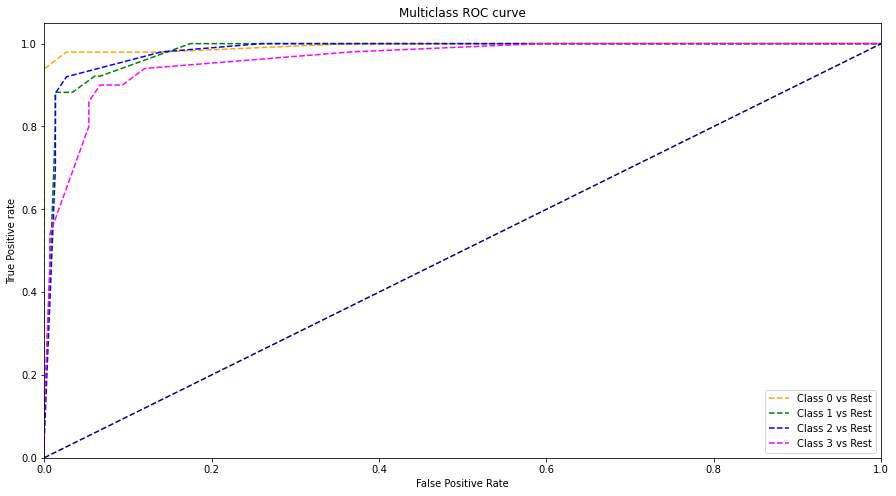

In [20]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [21]:
# Putting features
features = list(dfTrace.columns[1:21])
features

['receipt_status',
 'Contract_is_erc20',
 'trace_from_address',
 'trace_to_address',
 'trace_value',
 'trace_gas',
 'trace_gas_used',
 'token_transfer_from_address',
 'token_transfer_to_address',
 'token_transfer_value',
 'transaction_from_address',
 'transaction_to_address',
 'transaction_value',
 'transaction_gas',
 'transaction_gas_price',
 'receipt_cumulative_gas_used',
 'receipt_gas_used',
 'token_decimals',
 'token_total_supply',
 'Contract_address']

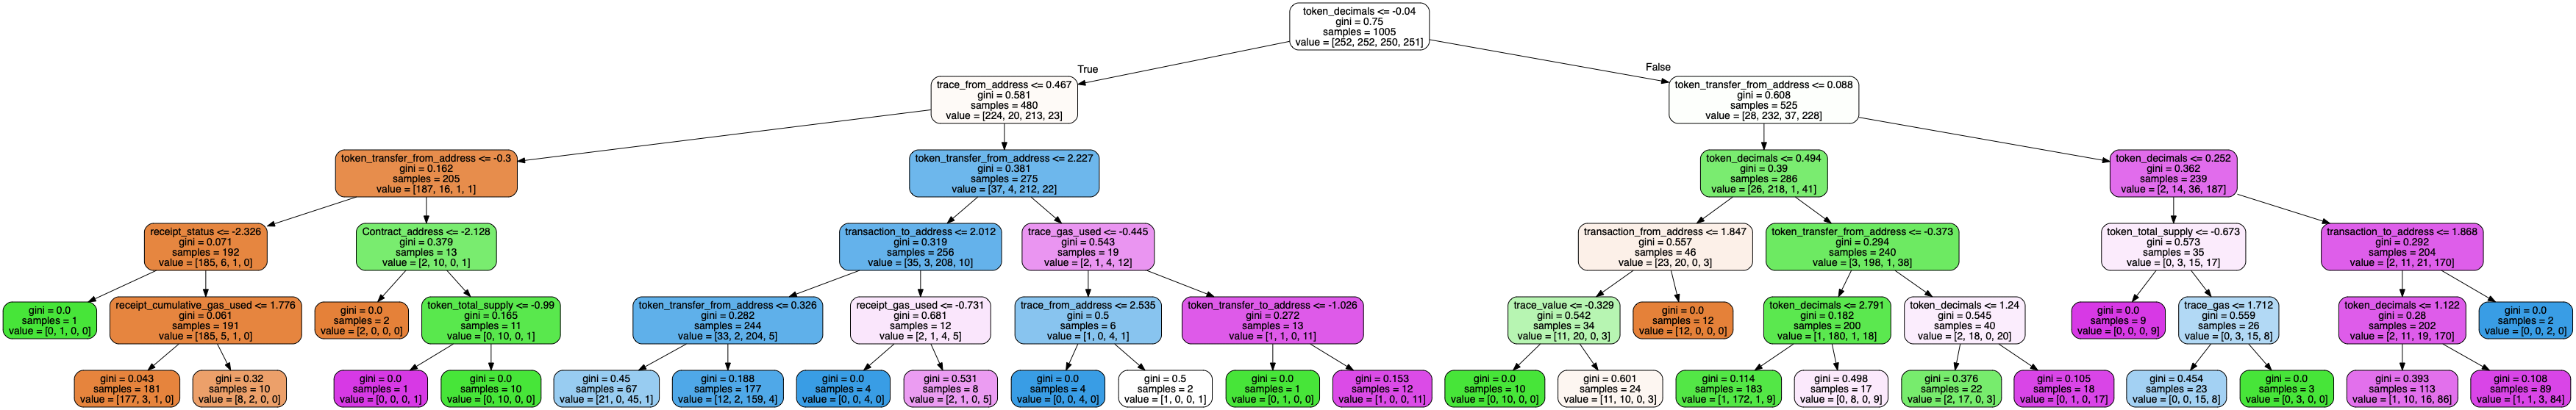

In [22]:
# plotting tree with max_depth=3

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [23]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = None)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [24]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002308      0.000195         0.000310        0.000050   
1       0.003667      0.000069         0.000278        0.000005   
2       0.005022      0.000036         0.000276        0.000007   
3       0.006520      0.000203         0.000337        0.000064   
4       0.007729      0.000060         0.000320        0.000023   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.452736           0.467662   
1               2  {'max_depth': 2}           0.786070           0.840796   
2               3  {'max_depth': 3}           0.800995           0.855721   
3               4  {'max_depth': 4}           0.825871           0.860697   
4               5  {'max_depth': 5}           0.805970           0.870647   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.437811           0.442786  ...         0.449751        0.010244   
1           0.756219           0.776119  ...         0.785075        0.029584   
2           0.771144           0.771144  ...         0.790050        0.036478   
3           0.786070           0.791045  ...         0.803980        0.035959   
4           0.781095           0.805970  ...         0.801990        0.040711   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.453980            0.450249   
1                8            0.803483            0.789801   
2                6            0.823383            0.805970   
3                2            0.840796            0.832090   
4                3            0.876866            0.873134   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.457711            0.451493            0.453980   
1            0.810945            0.805970            0.804726   
2            0.829602            0.823383            0.818408   
3            0.858209            0.848259            0.858209   
4            0.896766            0.896766            0.899254   

   mean_train_score  std_train_score  
0          0.453483         0.002561  
1          0.802985         0.007062  
2          0.820149         0.007929  
3          0.847512         0.010123  
4          0.888557         0.011169  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

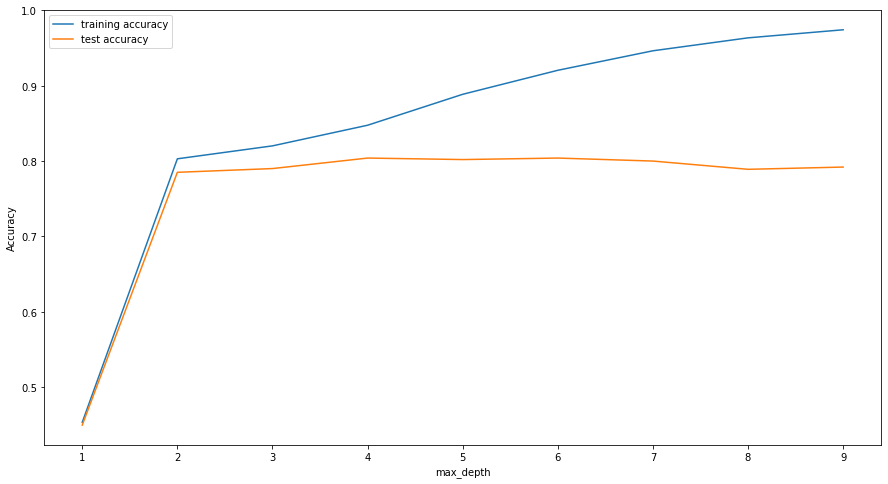

In [25]:
# plotting accuracies with max_depth
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(0,25)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(0, 25)},
             return_train_score=True, scoring='accuracy')

In [27]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000807      0.000106         0.000000        0.000000   
1       0.012686      0.000322         0.000363        0.000022   
2       0.011958      0.000525         0.000361        0.000026   
3       0.011043      0.000563         0.000399        0.000074   
4       0.010239      0.000386         0.000316        0.000035   

  param_min_samples_leaf                   params  split0_test_score  \
0                      0  {'min_samples_leaf': 0}                NaN   
1                      1  {'min_samples_leaf': 1}            0.79602   
2                      2  {'min_samples_leaf': 2}            0.80597   
3                      3  {'min_samples_leaf': 3}            0.80597   
4                      4  {'min_samples_leaf': 4}            0.81592   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.791045           0.751244           0.791045  ...   
2           0.810945           0.776119           0.800995  ...   
3           0.805970           0.771144           0.786070  ...   
4           0.791045           0.766169           0.771144  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN               25                 NaN   
1         0.770149        0.029248               24            1.000000   
2         0.790050        0.020729                4            0.956468   
3         0.782090        0.024251                9            0.941542   
4         0.775124        0.028038               18            0.925373   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            0.957711            0.958955            0.960199   
3            0.946517            0.942786            0.942786   
4            0.932836            0.929104            0.926617   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            0.958955          0.958458         0.001268  
3            0.944030          0.943532         0.001687  
4            0.925373          0.927861         0.002836  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

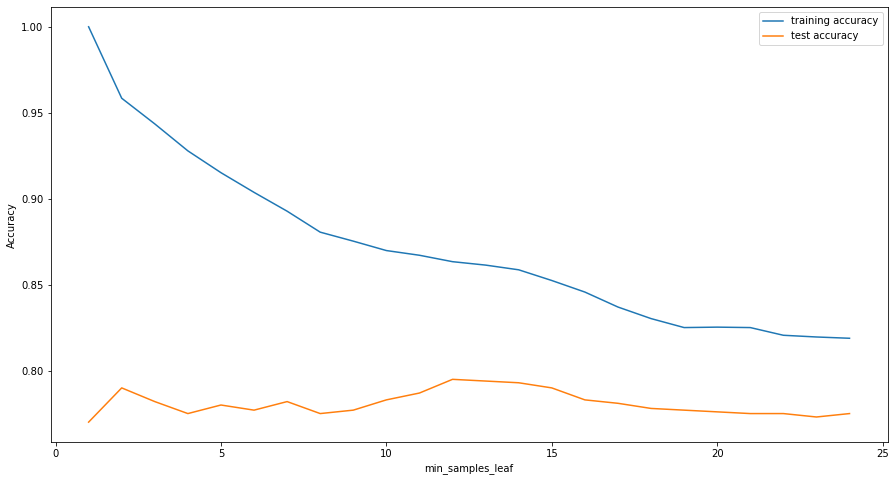

In [28]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1,50)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(1, 50)},
             return_train_score=True, scoring='accuracy')

In [30]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000782      0.000114         0.000000        0.000000   
1       0.012678      0.000348         0.000381        0.000023   
2       0.012591      0.000362         0.000361        0.000038   
3       0.012507      0.000654         0.000380        0.000048   
4       0.012151      0.000315         0.000323        0.000022   

  param_min_samples_split                    params  split0_test_score  \
0                       1  {'min_samples_split': 1}                NaN   
1                       2  {'min_samples_split': 2}           0.796020   
2                       3  {'min_samples_split': 3}           0.800995   
3                       4  {'min_samples_split': 4}           0.820896   
4                       5  {'min_samples_split': 5}           0.810945   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.791045           0.751244           0.791045  ...   
2           0.776119           0.751244           0.776119  ...   
3           0.766169           0.756219           0.805970  ...   
4           0.771144           0.761194           0.796020  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN               49                 NaN   
1         0.770149        0.029248               35            1.000000   
2         0.769154        0.021014               43            0.987562   
3         0.775124        0.034238               13            0.982587   
4         0.771144        0.032548               34            0.970149   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            0.995025            0.988806            0.987562   
3            0.985075            0.983831            0.977612   
4            0.981343            0.982587            0.972637   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            0.983831          0.988557         0.003639  
3            0.981343          0.982090         0.002561  
4            0.971393          0.975622         0.005253  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

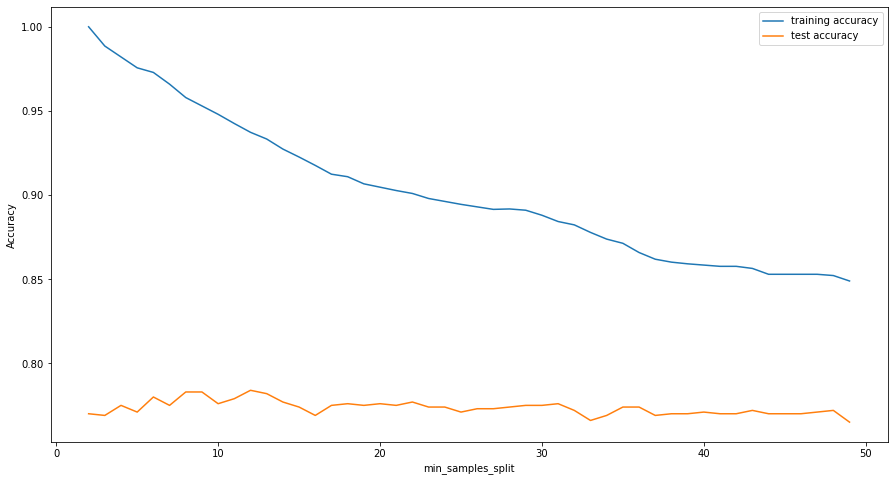

In [31]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10),
    'min_samples_leaf': range(0, 25,5),
    'min_samples_split': range(1,50,5),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:   24.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(0, 25, 5),
                         'min_samples_split': range(1, 50, 5)},
             return_train_score=True, verbose=1)

In [33]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.000481      0.000155         0.000000        0.000000   
1         0.000405      0.000014         0.000000        0.000000   
2         0.000395      0.000002         0.000000        0.000000   
3         0.000395      0.000002         0.000000        0.000000   
4         0.000398      0.000003         0.000000        0.000000   
..             ...           ...              ...             ...   
895       0.005964      0.000080         0.000222        0.000003   
896       0.006002      0.000095         0.000221        0.000001   
897       0.005974      0.000076         0.000220        0.000001   
898       0.006012      0.000088         0.000249        0.000033   
899       0.006068      0.000847         0.000248        0.000035   

    param_criterion param_max_depth param_min_samples_leaf  \
0           entropy               1                      0   
1           entropy               1                      0   
2           entropy               1                      0   
3           entropy               1                      0   
4           entropy               1                      0   
..              ...             ...                    ...   
895            gini               9                     20   
896            gini               9                     20   
897            gini               9                     20   
898            gini               9                     20   
899            gini               9                     20   

    param_min_samples_split  \
0                         1   
1                         6   
2                        11   
3                        16   
4                        21   
..                      ...   
895                      26   
896                      31   
897                      36   
898                      41   
899                      46   

                                                params  split0_test_score  \
0    {'criterion': 'entropy', 'max_depth': 1, 'min_...                NaN   
1    {'criterion': 'entropy', 'max_depth': 1, 'min_...                NaN   
2    {'criterion': 'entropy', 'max_depth': 1, 'min_...                NaN   
3    {'criterion': 'entropy', 'max_depth': 1, 'min_...                NaN   
4    {'criterion': 'entropy', 'max_depth': 1, 'min_...                NaN   
..                                                 ...                ...   
895  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.751244   
896  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.751244   
897  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.751244   
898  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.751244   
899  {'criterion': 'gini', 'max_depth': 9, 'min_sam...           0.751244   

     ...  mean_test_score  std_test_score  rank_test_score  \
0    ...              NaN             NaN              900   
1    ...              NaN             NaN              725   
2    ...              NaN             NaN              724   
3    ...              NaN             NaN              723   
4    ...              NaN             NaN              722   
..   ...              ...             ...              ...   
895  ...         0.776119        0.039048              543   
896  ...         0.776119        0.039048              543   
897  ...         0.776119        0.039048              543   
898  ...         0.776119        0.039048              543   
899  ...         0.774129        0.035264              572   

     split0_train_score  split1_train_score  split2_train_score  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3                   NaN                 NaN                 NaN   
4                   NaN                 NaN          

In [34]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8149253731343282
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=36)


In [35]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=10,
                                  min_samples_split=36)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.9


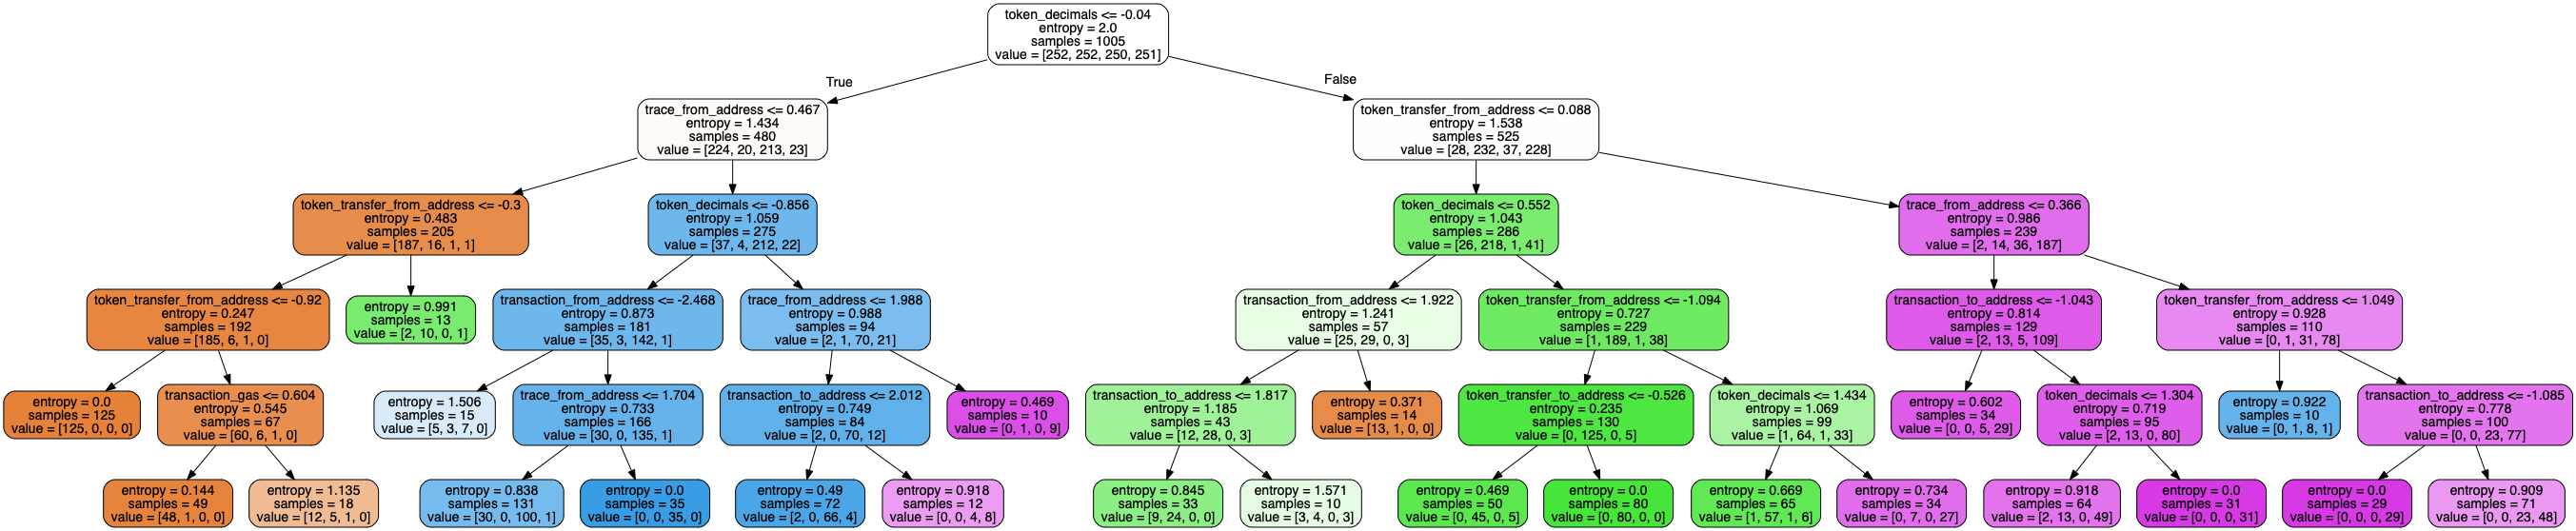

In [36]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred = clf_gini.predict(X_test)
y_pred_prob = clf_gini.predict_proba(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.87      0.92      0.90        51
           2       0.96      0.86      0.91        50
           3       0.80      0.88      0.84        50

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200



In [38]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision=sklearn.metrics.precision_score(y_test, y_pred,average='macro')
recall=sklearn.metrics.recall_score(y_test, y_pred,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 90.00% 
Precision: 90.65% 
Recall: 90.01% 


In [39]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[46  2  1  0]
 [ 0 47  0  4]
 [ 0  0 43  7]
 [ 0  5  1 44]]


Accuracy    : 90.00% 
Sensitivity : 100.00% 
Specificity : 95.83% 


True Postive Rate : 100.00% 
False Postive Rate : 4.17% 
Positive Predictive Value : 95.92% 
Negative Predictive Value : 100.00% 


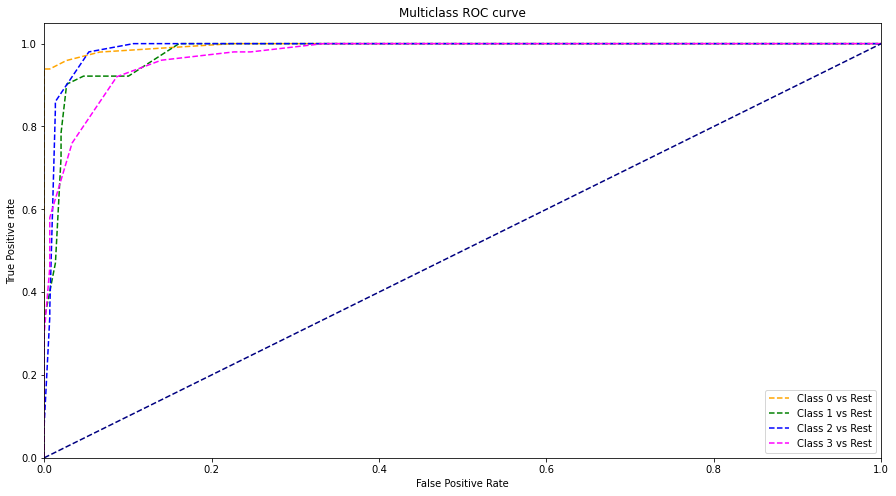

In [40]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

# Random Forest

In [41]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=101)

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [42]:
# Making predictions

predictions = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

In [43]:
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
precision=sklearn.metrics.precision_score(y_test, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 100.00% 
Precision: 100.00% 
Recall: 100.00% 


In [44]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[49  0  0  0]
 [ 0 51  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


Accuracy    : 100.00% 
Sensitivity : 100.00% 
Specificity : 100.00% 


True Postive Rate : 100.00% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 100.00% 


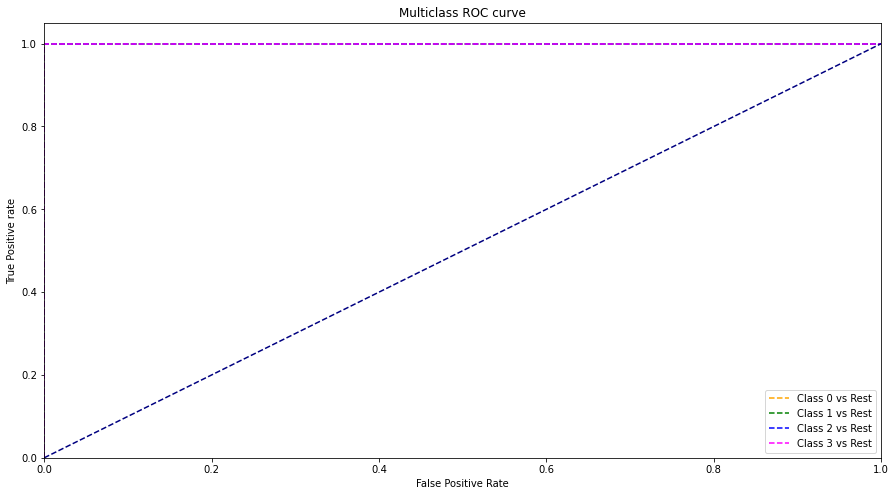

In [45]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [46]:
# Tuning max_features

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_features': [4, 8, 14, 20]},
             return_train_score=True, scoring='accuracy')

In [47]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.188669      0.030961         0.008748        0.001059   
1       0.252123      0.036064         0.008751        0.001634   
2       0.381334      0.047245         0.008311        0.001146   
3       0.436554      0.035984         0.007502        0.000386   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.766169   
1                  8   {'max_features': 8}           0.796020   
2                 14  {'max_features': 14}           0.791045   
3                 20  {'max_features': 20}           0.810945   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.850746           0.756219           0.810945  ...   
1           0.870647           0.771144           0.850746  ...   
2           0.875622           0.781095           0.830846  ...   
3           0.875622           0.786070           0.845771  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.798010        0.033977                4            0.861940   
1         0.819900        0.036206                2            0.875622   
2         0.819900        0.033359                2            0.891791   
3         0.825871        0.031308                1            0.891791   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.848259            0.864428            0.848259   
1            0.873134            0.881841            0.874378   
2            0.888060            0.894279            0.884328   
3            0.889303            0.902985            0.893035   

   split4_train_score  mean_train_score  std_train_score  
0            0.855721          0.855721         0.006721  
1            0.879353          0.876866         0.003243  
2            0.891791          0.890050         0.003483  
3            0.900498          0.895522         0.005277  

[4 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

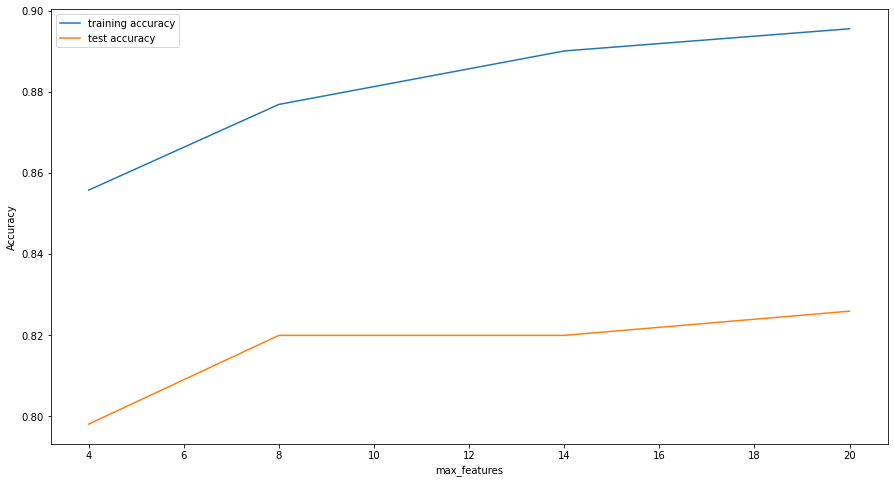

In [48]:
# plotting accuracies with max_features
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(0,5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(0, 5)},
             return_train_score=True, scoring='accuracy')

In [50]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.053430      0.029107         0.000000        0.000000   
1       0.277232      0.026331         0.010455        0.001070   
2       0.235219      0.035134         0.009429        0.001560   
3       0.225226      0.027747         0.008558        0.001083   
4       0.193774      0.003162         0.007926        0.000628   

  param_min_samples_leaf                   params  split0_test_score  \
0                      0  {'min_samples_leaf': 0}                NaN   
1                      1  {'min_samples_leaf': 1}           0.800995   
2                      2  {'min_samples_leaf': 2}           0.791045   
3                      3  {'min_samples_leaf': 3}           0.786070   
4                      4  {'min_samples_leaf': 4}           0.791045   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.870647           0.771144           0.850746  ...   
2           0.880597           0.766169           0.845771  ...   
3           0.875622           0.781095           0.840796  ...   
4           0.875622           0.761194           0.835821  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                5                 NaN   
1         0.822886        0.035264                1            1.000000   
2         0.814925        0.041909                3            0.977612   
3         0.819900        0.035236                2            0.956468   
4         0.812935        0.039376                4            0.929104   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            0.988806            0.990050            0.986318   
3            0.958955            0.953980            0.950249   
4            0.929104            0.925373            0.915423   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            0.987562          0.986070         0.004408  
3            0.949005          0.953731         0.003723  
4            0.929104          0.925622         0.005300  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

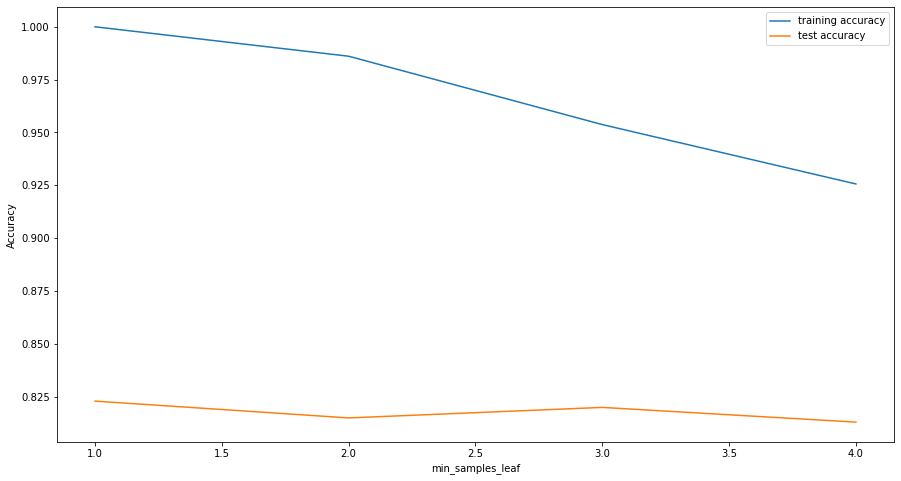

In [51]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1, 6)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(1, 6)},
             return_train_score=True, scoring='accuracy')

In [53]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.040147      0.000958         0.000000        0.000000   
1       0.227238      0.032469         0.008680        0.000826   
2       0.265025      0.036673         0.010350        0.001870   
3       0.221836      0.024585         0.008648        0.001410   
4       0.238289      0.033094         0.009620        0.001921   

  param_min_samples_split                    params  split0_test_score  \
0                       1  {'min_samples_split': 1}                NaN   
1                       2  {'min_samples_split': 2}            0.79602   
2                       3  {'min_samples_split': 3}            0.79602   
3                       4  {'min_samples_split': 4}            0.81592   
4                       5  {'min_samples_split': 5}            0.79602   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.870647           0.751244           0.855721  ...   
2           0.865672           0.766169           0.840796  ...   
3           0.865672           0.761194           0.860697  ...   
4           0.880597           0.756219           0.840796  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                5                 NaN   
1         0.816915        0.042844                2            1.000000   
2         0.814925        0.034812                4            1.000000   
3         0.820896        0.038921                1            1.000000   
4         0.815920        0.042098                3            0.992537   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            0.997512            0.998756            1.000000   
4            0.993781            0.996269            0.997512   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            0.996269          0.998507         0.001450  
4            0.990050          0.994030         0.002656  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

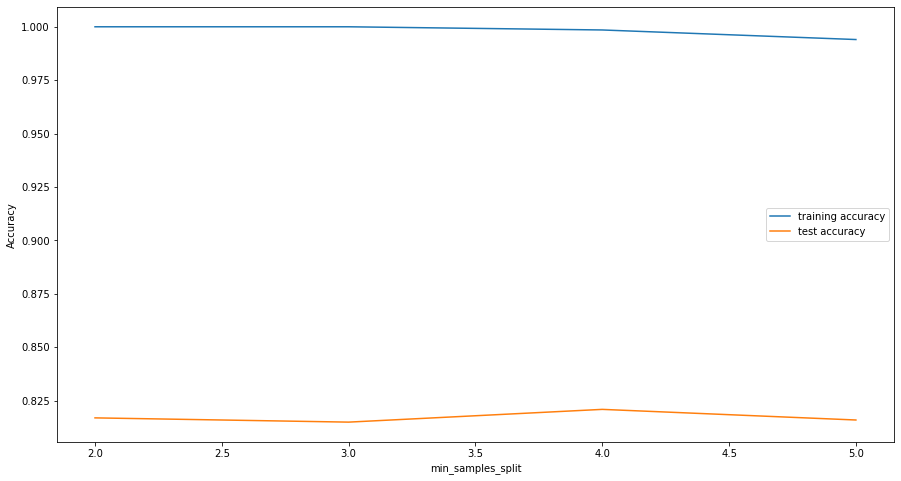

In [54]:
# plotting accuracies with min_samples_split
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,5,10],
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(1,6),
    'n_estimators': [100,200, 300], 
    'max_features': [2,4,6,8,10,12,14,16,18,20]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, return_train_score=True)

In [56]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 19.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 6),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [57]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8398009950248756 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}


In [59]:
# Fitting the final model with the best parameters obtained from grid search.
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=3, 
                             min_samples_split=3,
                             max_features=20,
                             n_estimators=200)

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=200)

In [61]:
# Making predictions
predictions = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

In [62]:
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
precision=sklearn.metrics.precision_score(y_test, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 97.00% 
Precision: 97.04% 
Recall: 97.00% 


In [63]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[48  0  1  0]
 [ 0 50  0  1]
 [ 0  0 49  1]
 [ 0  2  1 47]]


Accuracy    : 97.00% 
Sensitivity : 100.00% 
Specificity : 100.00% 


True Postive Rate : 100.00% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 100.00% 


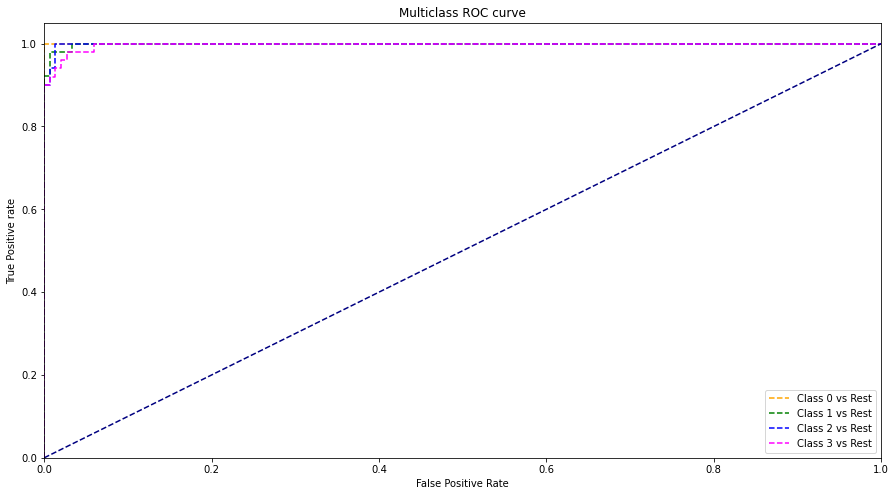

In [64]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


# XGBoost

In [65]:
# Fitting the decision tree with default hyperparameters, apart from
#model = XGBClassifier()
#model.fit(X_train, y_train)

model = XGBClassifier()
eval_set=[(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric="merror", eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.07761	validation_1-merror:0.04000
[1]	validation_0-merror:0.06567	validation_1-merror:0.02500
[2]	validation_0-merror:0.05970	validation_1-merror:0.03000
[3]	validation_0-merror:0.05572	validation_1-merror:0.02000
[4]	validation_0-merror:0.05075	validation_1-merror:0.02000
[5]	validation_0-merror:0.04876	validation_1-merror:0.02000
[6]	validation_0-merror:0.04279	validation_1-merror:0.02000
[7]	validation_0-merror:0.03781	validation_1-merror:0.01500
[8]	validation_0-merror:0.02786	validation_1-merror:0.01500
[9]	validation_0-merror:0.02090	validation_1-merror:0.01000
[10]	validation_0-merror:0.01493	validation_1-merror:0.00500
[11]	validation_0-merror:0.00895	validation_1-merror:0.00000
[12]	validation_0-merror:0.00696	validation_1-merror:0.00000
[13]	validation_0-merror:0.00498	validation_1-merror:0.00000
[14]	validation_0-merror:0.00100	validation_1-merror:0.00000
[15]	validation_0-merror:0.00199	validation_1-merror:0.00000
[16]	validation_0-merror:0.00100	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[16:46:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

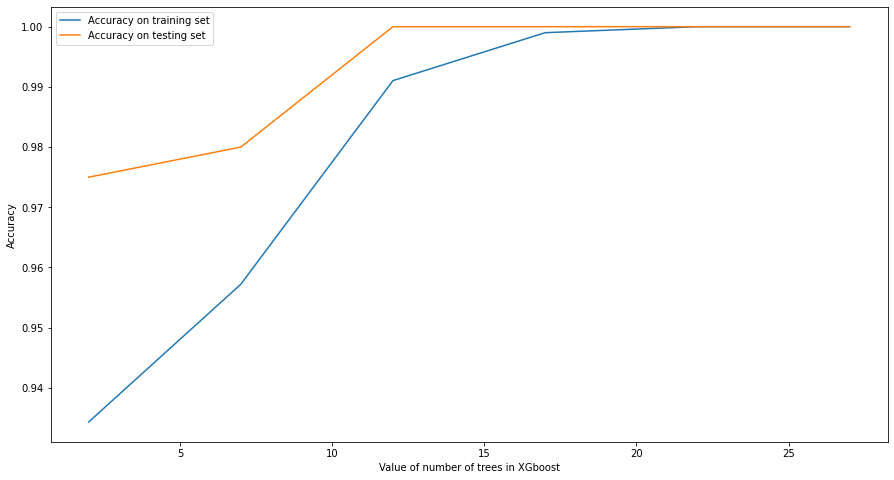

In [66]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.subplots(figsize=(15,8))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [67]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_prediction = model.predict(X_test)
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[2.5446154e-04, 9.9949527e-01, 1.5970852e-04, 9.0594360e-05],
       [2.0442794e-05, 7.0879178e-05, 3.4956462e-03, 9.9641305e-01],
       [6.9571193e-04, 2.1542964e-04, 9.9900168e-01, 8.7197310e-05],
       [2.7623756e-03, 9.9477732e-01, 2.0378592e-04, 2.2565492e-03],
       [2.5458133e-03, 9.9552649e-01, 2.1030300e-04, 1.7173419e-03],
       [2.6808979e-03, 3.0211848e-04, 9.9696356e-01, 5.3471605e-05],
       [4.1799860e-05, 2.1294967e-05, 7.1845949e-04, 9.9921846e-01],
       [2.9341469e-04, 4.8503495e-04, 4.1682555e-04, 9.9880469e-01],
       [3.7167121e-03, 9.9080104e-01, 4.4848977e-04, 5.0337347e-03],
       [8.3990870e-03, 9.9118268e-01, 1.5129102e-04, 2.6698963e-04]],
      dtype=float32)

In [68]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction)
precision=sklearn.metrics.precision_score(y_test, y_prediction,average='macro')
recall=sklearn.metrics.recall_score(y_test, y_prediction,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 100.00% 
Precision: 100.00% 
Recall: 100.00% 


In [69]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,y_prediction)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[49  0  0  0]
 [ 0 51  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


Accuracy    : 100.00% 
Sensitivity : 100.00% 
Specificity : 100.00% 


True Postive Rate : 100.00% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 100.00% 


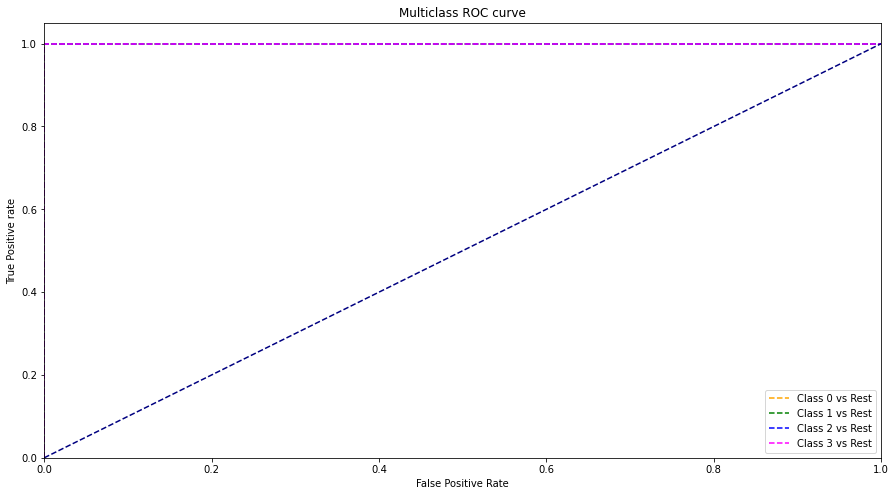

In [70]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [71]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=10, objective='multi:softprob',n_estimators=100, num_class=4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc_ovr', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [72]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[16:48:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:48:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

[16:48:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.8s finished


[16:48:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=10, min_child_weight=None,
                                     missi...
                                     n_estimators=100, n_jobs=None, num_class=4,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=None,
                                     reg_l

In [73]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.298621      0.132010         0.004018        0.000289   
1       0.689910      0.268153         0.004662        0.000648   
2       0.633519      0.106042         0.004230        0.000341   
3       0.241362      0.056893         0.004159        0.000252   
4       0.310216      0.087551         0.005505        0.002418   
5       0.311373      0.052110         0.004665        0.000350   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.954191   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.960872   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.963656   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.934157   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.955152   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.956569   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.967022           0.935781  ...         0.952422        0.011339   
1           0.969219           0.941952  ...         0.958469        0.009567   
2           0.968529           0.940259  ...         0.958885        0.010475   
3           0.955142           0.931005  ...         0.938572        0.008746   
4           0.964130           0.941424  ...         0.955091        0.010170   
5           0.959273           0.940372  ...         0.953712        0.007901   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.999998            0.999998   
1                2            1.000000            1.000000   
2                1            1.000000            1.000000   
3                6            1.000000            1.000000   
4                3            1.000000            1.000000   
5                4            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.999998            0.999998            0.999998   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            1.000000            1.000000            1.000000   
4            1.000000            1.000000            1.000000   
5            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          0.999998     3.332182e-09  
1          1.000000     0.000000e+00  
2          1.000000     0.000000e+00  
3          1.000000     0.000000e+00  
4          1.000000     0.000000e+00  
5          1.000000     0.000000e+00  

[6 rows x 22 columns]

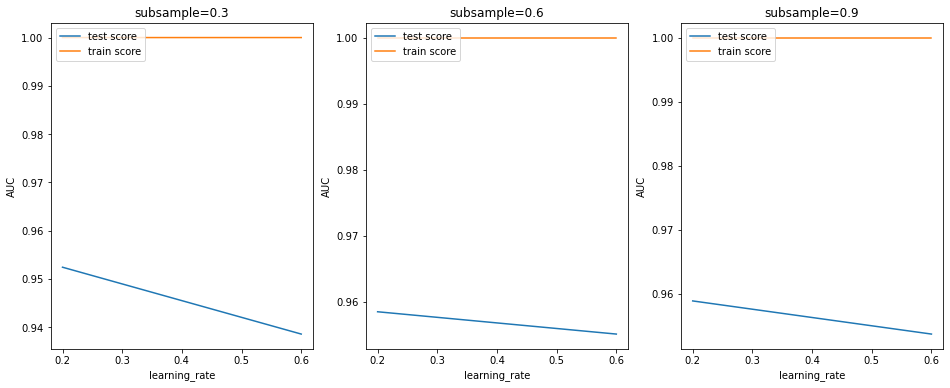

In [74]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    #plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.xscale('log')

In [75]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

#The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal.
#Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

params = {'learning_rate': 0.2,
          'max_depth': 10, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

[16:50:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:50:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob',
              params={'learning_rate': 0.2, 'max_depth': 10,
                      'n_estimators': 100, 'objective': 'binary:logistic',
                      'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [76]:
y_prediction = model.predict(X_test)
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[2.5446154e-04, 9.9949527e-01, 1.5970852e-04, 9.0594360e-05],
       [2.0442794e-05, 7.0879178e-05, 3.4956462e-03, 9.9641305e-01],
       [6.9571193e-04, 2.1542964e-04, 9.9900168e-01, 8.7197310e-05],
       [2.7623756e-03, 9.9477732e-01, 2.0378592e-04, 2.2565492e-03],
       [2.5458133e-03, 9.9552649e-01, 2.1030300e-04, 1.7173419e-03],
       [2.6808979e-03, 3.0211848e-04, 9.9696356e-01, 5.3471605e-05],
       [4.1799860e-05, 2.1294967e-05, 7.1845949e-04, 9.9921846e-01],
       [2.9341469e-04, 4.8503495e-04, 4.1682555e-04, 9.9880469e-01],
       [3.7167121e-03, 9.9080104e-01, 4.4848977e-04, 5.0337347e-03],
       [8.3990870e-03, 9.9118268e-01, 1.5129102e-04, 2.6698963e-04]],
      dtype=float32)

In [77]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction)
precision=sklearn.metrics.precision_score(y_test, y_prediction,average='macro')
recall=sklearn.metrics.recall_score(y_test, y_prediction,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 100.00% 
Precision: 100.00% 
Recall: 100.00% 


In [78]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,y_prediction)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[49  0  0  0]
 [ 0 51  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


Accuracy    : 100.00% 
Sensitivity : 100.00% 
Specificity : 100.00% 


True Postive Rate : 100.00% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 100.00% 


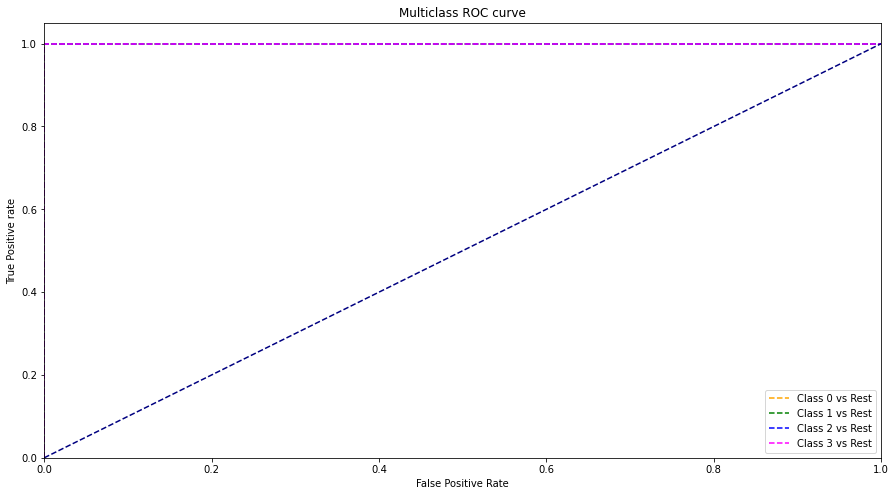

In [79]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [80]:
# feature importance
importance = dict(zip(feature_cols.columns, model.feature_importances_))
importance = sorted(importance.items(), key=lambda x:x[1],reverse=True)
importance

[('trace_from_address', 0.31223676),
 ('token_transfer_from_address', 0.17145228),
 ('token_decimals', 0.15393606),
 ('transaction_from_address', 0.041879725),
 ('transaction_to_address', 0.03227271),
 ('token_transfer_value', 0.024022084),
 ('trace_to_address', 0.022802249),
 ('token_transfer_to_address', 0.022083549),
 ('receipt_gas_used', 0.021107579),
 ('token_total_supply', 0.020348623),
 ('Contract_is_erc20', 0.020025734),
 ('trace_gas', 0.019482283),
 ('transaction_value', 0.019274225),
 ('transaction_gas_price', 0.018647289),
 ('trace_gas_used', 0.018371554),
 ('trace_value', 0.018264629),
 ('Contract_address', 0.017543346),
 ('transaction_gas', 0.015902279),
 ('receipt_cumulative_gas_used', 0.015797365),
 ('receipt_status', 0.014549732)]

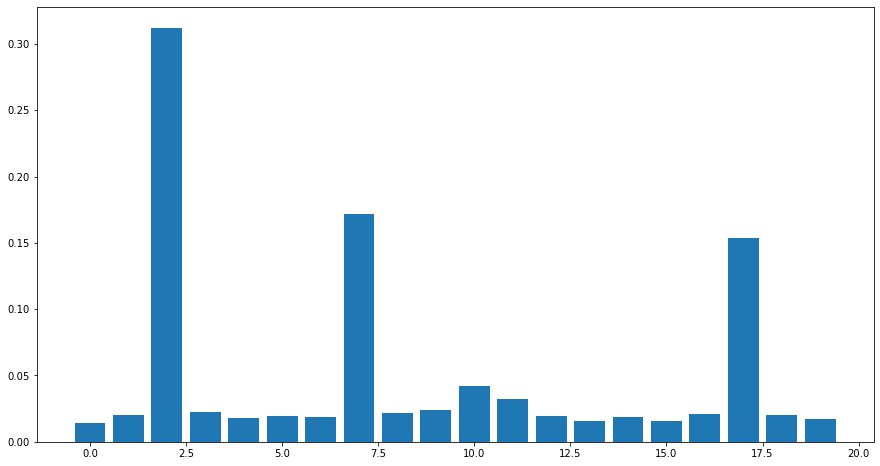

In [81]:
# plot
plt.subplots(figsize=(15,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

### Print the class distribution after applying SMOTE 

### Build models on other algorithms to see the better performing on SMOTE

In [82]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do


In [83]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
X_train_cv = X_train_smote
X_test_cv = X_test
y_train_cv = y_train_smote
y_test_cv = y_test

### Similarly explore other algorithms on balanced dataset by building models like:
- Decision Tree
- Random Forest
- XGBoost

# Decision Tree

In [84]:
# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(max_depth=5)

In [85]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions

y_pred_default = dt_default.predict(X_test_cv)
y_pred_prob = dt_default.predict_proba(X_test_cv)

# Printing classification report
print(classification_report(y_test_cv, y_pred_default))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.96      0.88      0.92        51
           2       0.92      0.92      0.92        50
           3       0.84      0.86      0.85        50

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [87]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred_default)
precision=sklearn.metrics.precision_score(y_test_cv, y_pred_default,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, y_pred_default,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 91.00% 
Precision: 91.09% 
Recall: 91.05% 


In [88]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,y_pred_default)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred_default)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[48  0  1  0]
 [ 2 45  0  4]
 [ 0  0 46  4]
 [ 2  2  3 43]]


Accuracy    : 91.00% 
Sensitivity : 95.74% 
Specificity : 100.00% 


True Postive Rate : 95.74% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 96.00% 


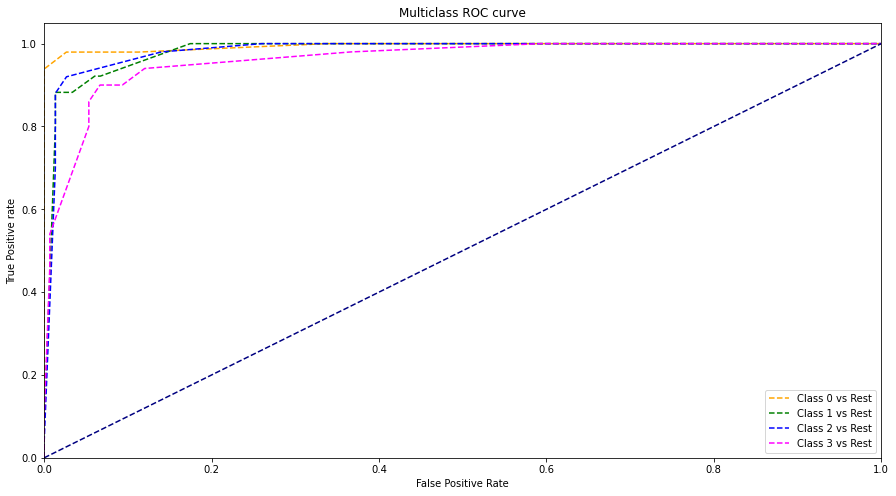

In [89]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [90]:
# Putting features
features = list(dfTrace.columns[1:21])
features

['receipt_status',
 'Contract_is_erc20',
 'trace_from_address',
 'trace_to_address',
 'trace_value',
 'trace_gas',
 'trace_gas_used',
 'token_transfer_from_address',
 'token_transfer_to_address',
 'token_transfer_value',
 'transaction_from_address',
 'transaction_to_address',
 'transaction_value',
 'transaction_gas',
 'transaction_gas_price',
 'receipt_cumulative_gas_used',
 'receipt_gas_used',
 'token_decimals',
 'token_total_supply',
 'Contract_address']

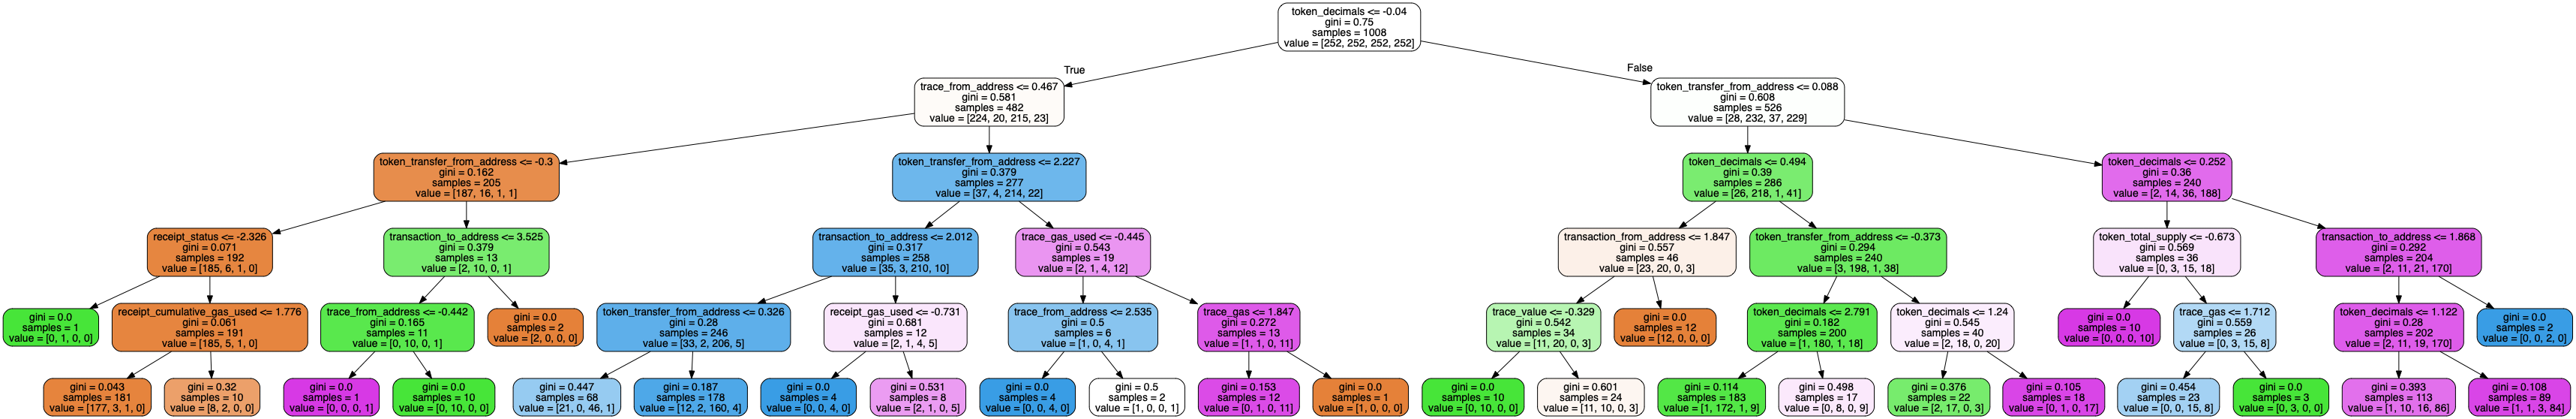

In [91]:
# plotting tree with max_depth=3

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [92]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = None)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [93]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002388      0.000226         0.000363        0.000061   
1       0.003744      0.000055         0.000295        0.000011   
2       0.005176      0.000050         0.000315        0.000031   
3       0.006646      0.000169         0.000353        0.000033   
4       0.008177      0.000200         0.000394        0.000031   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.455446           0.455446   
1               2  {'max_depth': 2}           0.787129           0.831683   
2               3  {'max_depth': 3}           0.792079           0.846535   
3               4  {'max_depth': 4}           0.806931           0.851485   
4               5  {'max_depth': 5}           0.792079           0.811881   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.440594           0.432836  ...         0.447411        0.009125   
1           0.767327           0.771144  ...         0.786680        0.023465   
2           0.782178           0.781095  ...         0.792616        0.028763   
3           0.797030           0.796020  ...         0.803527        0.027589   
4           0.801980           0.781095  ...         0.789646        0.017522   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.451613            0.451613   
1                6            0.803970            0.792804   
2                3            0.823821            0.808933   
3                2            0.841191            0.838710   
4                5            0.875931            0.880893   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.455335            0.452292            0.451053   
1            0.808933            0.804213            0.802974   
2            0.827543            0.827757            0.816605   
3            0.857320            0.851301            0.856258   
4            0.894541            0.882280            0.898389   

   mean_train_score  std_train_score  
0          0.452381         0.001528  
1          0.802579         0.005304  
2          0.820932         0.007230  
3          0.848956         0.007669  
4          0.886407         0.008566  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

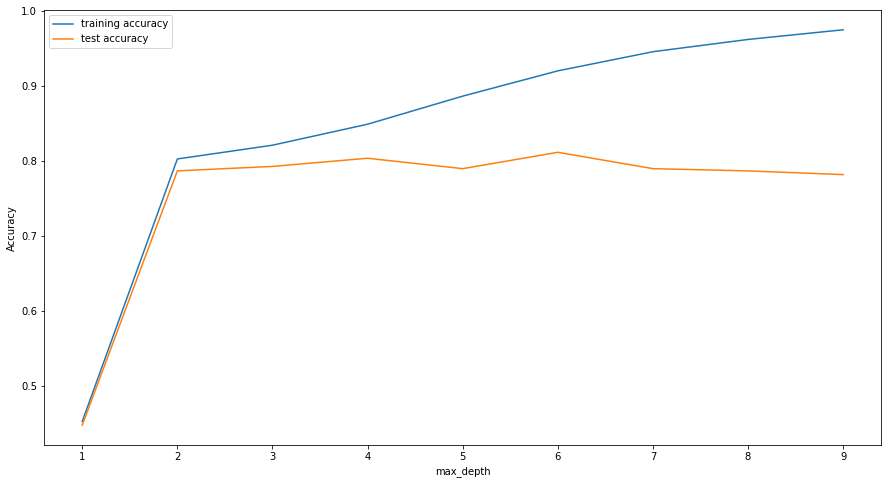

In [94]:
# plotting accuracies with max_depth
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [95]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(0,25)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(0, 25)},
             return_train_score=True, scoring='accuracy')

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000760      0.000098         0.000000        0.000000   
1       0.013162      0.000362         0.000405        0.000013   
2       0.012313      0.000488         0.000396        0.000036   
3       0.011640      0.000557         0.000442        0.000062   
4       0.011106      0.000365         0.000379        0.000029   

  param_min_samples_leaf                   params  split0_test_score  \
0                      0  {'min_samples_leaf': 0}                NaN   
1                      1  {'min_samples_leaf': 1}           0.806931   
2                      2  {'min_samples_leaf': 2}           0.792079   
3                      3  {'min_samples_leaf': 3}           0.782178   
4                      4  {'min_samples_leaf': 4}           0.811881   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.816832           0.757426           0.771144  ...   
2           0.797030           0.762376           0.791045  ...   
3           0.772277           0.752475           0.771144  ...   
4           0.787129           0.792079           0.800995  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN               25                 NaN   
1         0.772755        0.037703               16            1.000000   
2         0.781740        0.014454               13            0.956576   
3         0.764869        0.013367               20            0.940447   
4         0.790656        0.016970                3            0.925558   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            0.961538            0.964020            0.961586   
3            0.942928            0.952854            0.931846   
4            0.925558            0.935484            0.924411   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            0.957869          0.960318         0.002713  
3            0.942999          0.942215         0.006707  
4            0.928129          0.927828         0.004017  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

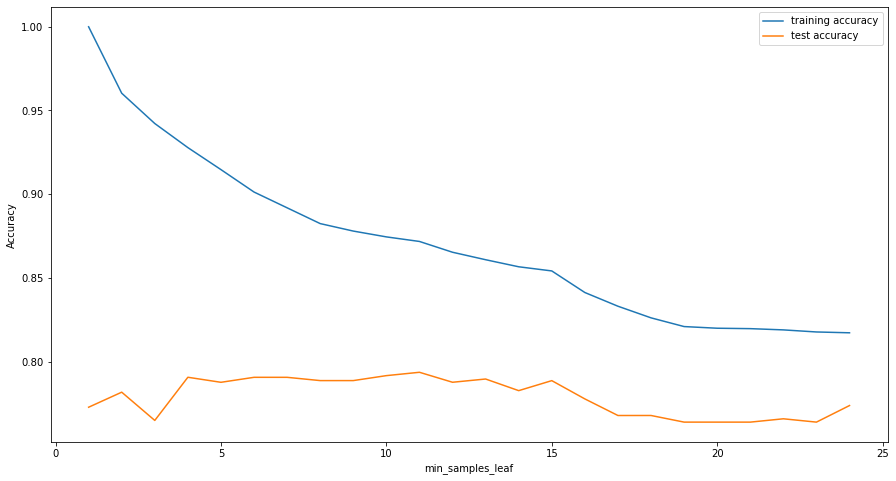

In [97]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [98]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1,50)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(1, 50)},
             return_train_score=True, scoring='accuracy')

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000749      0.000167         0.000000        0.000000   
1       0.013373      0.000611         0.000462        0.000064   
2       0.013131      0.000439         0.000474        0.000137   
3       0.012917      0.000427         0.000402        0.000006   
4       0.012956      0.000431         0.000393        0.000017   

  param_min_samples_split                    params  split0_test_score  \
0                       1  {'min_samples_split': 1}                NaN   
1                       2  {'min_samples_split': 2}           0.806931   
2                       3  {'min_samples_split': 3}           0.782178   
3                       4  {'min_samples_split': 4}           0.787129   
4                       5  {'min_samples_split': 5}           0.801980   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.816832           0.757426           0.771144  ...   
2           0.797030           0.777228           0.786070  ...   
3           0.787129           0.772277           0.786070  ...   
4           0.777228           0.757426           0.781095  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN               49                 NaN   
1         0.772755        0.037703               18            1.000000   
2         0.774770        0.022671               16            0.986352   
3         0.766819        0.033145               28            0.981390   
4         0.767824        0.027185               26            0.967742   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            0.995037            0.992556            0.990087   
3            0.986352            0.987593            0.982652   
4            0.978908            0.983871            0.975217   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            0.983891          0.989585         0.004042  
3            0.981413          0.983880         0.002596  
4            0.970260          0.975200         0.005813  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

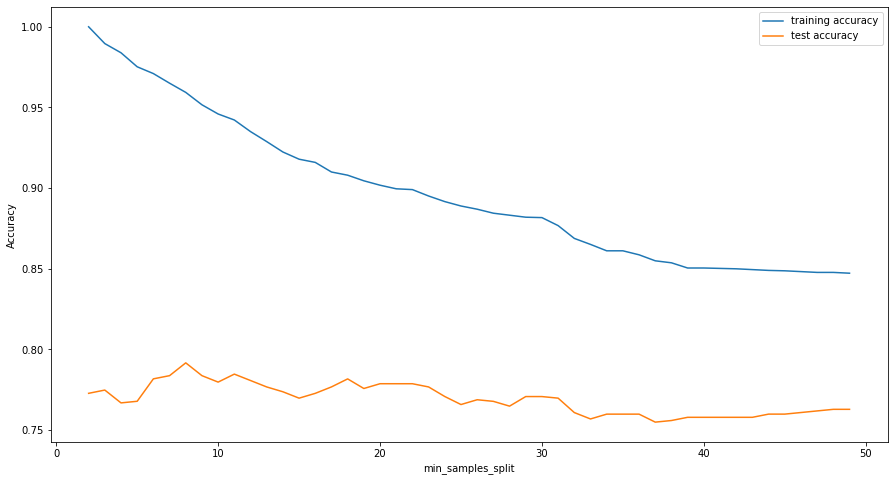

In [100]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [101]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,30,5),
    'min_samples_leaf': range(0,25,5),
    'min_samples_split': range(1,50,5),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_cv,y_train_cv)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   17.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 30, 5),
                         'min_samples_leaf': range(0, 25, 5),
                         'min_samples_split': range(1, 50, 5)},
             return_train_score=True, verbose=1)

In [102]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.000502      0.000198         0.000000        0.000000   
1         0.000390      0.000010         0.000000        0.000000   
2         0.000432      0.000108         0.000000        0.000000   
3         0.000376      0.000010         0.000000        0.000000   
4         0.000384      0.000009         0.000000        0.000000   
..             ...           ...              ...             ...   
495       0.005730      0.000033         0.000213        0.000002   
496       0.005468      0.000337         0.000202        0.000014   
497       0.005286      0.000162         0.000196        0.000006   
498       0.005663      0.000095         0.000218        0.000005   
499       0.005726      0.000066         0.000218        0.000002   

    param_criterion param_max_depth param_min_samples_leaf  \
0           entropy               5                      0   
1           entropy               5                      0   
2           entropy               5                      0   
3           entropy               5                      0   
4           entropy               5                      0   
..              ...             ...                    ...   
495            gini              25                     20   
496            gini              25                     20   
497            gini              25                     20   
498            gini              25                     20   
499            gini              25                     20   

    param_min_samples_split  \
0                         1   
1                         6   
2                        11   
3                        16   
4                        21   
..                      ...   
495                      26   
496                      31   
497                      36   
498                      41   
499                      46   

                                                params  split0_test_score  \
0    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
1    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
2    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
3    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
4    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
..                                                 ...                ...   
495  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.752475   
496  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.752475   
497  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.752475   
498  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.752475   
499  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.752475   

     ...  mean_test_score  std_test_score  rank_test_score  \
0    ...              NaN             NaN              500   
1    ...              NaN             NaN              409   
2    ...              NaN             NaN              408   
3    ...              NaN             NaN              407   
4    ...              NaN             NaN              406   
..   ...              ...             ...              ...   
495  ...         0.763854        0.022872              325   
496  ...         0.763854        0.022872              325   
497  ...         0.763854        0.022872              325   
498  ...         0.763854        0.022872              325   
499  ...         0.763854        0.022872              325   

     split0_train_score  split1_train_score  split2_train_score  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3                   NaN                 NaN                 NaN   
4                   NaN                 NaN          

In [103]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.820427565144574
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=6)


In [104]:
#tree with max_depth = 5
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=5,
                                  min_samples_split=6)
clf_gini.fit(X_train_cv, y_train_cv)

# score
print(clf_gini.score(X_test_cv,y_test_cv))

0.89


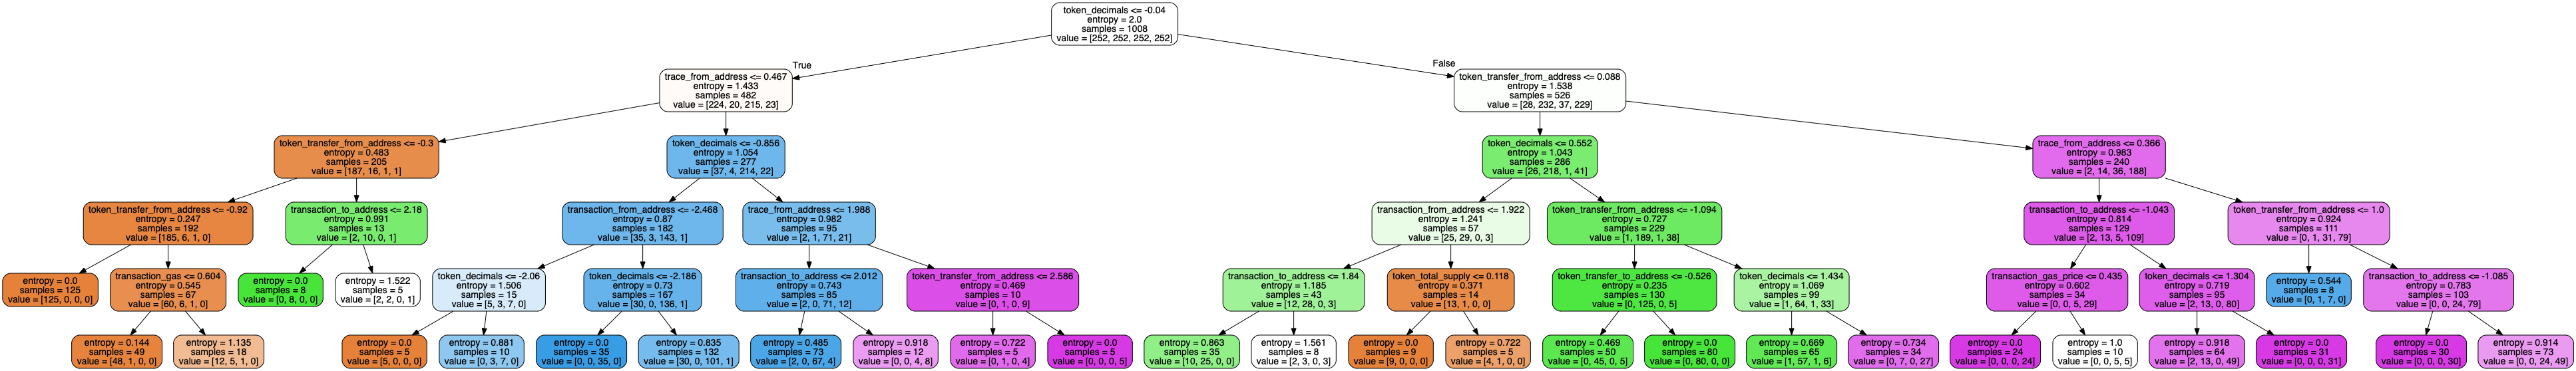

In [105]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [107]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred = clf_gini.predict(X_test_cv)
y_pred_prob = clf_gini.predict_proba(X_test_cv)

# Printing classification report
print(classification_report(y_test_cv, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        49
           1       0.87      0.90      0.88        51
           2       0.92      0.88      0.90        50
           3       0.81      0.84      0.82        50

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [108]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
precision=sklearn.metrics.precision_score(y_test_cv, y_pred,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, y_pred,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 89.00% 
Precision: 89.28% 
Recall: 89.02% 


In [109]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,y_pred)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[46  2  1  0]
 [ 1 46  0  4]
 [ 0  0 44  6]
 [ 0  5  3 42]]


Accuracy    : 89.00% 
Sensitivity : 97.87% 
Specificity : 95.83% 


True Postive Rate : 97.87% 
False Postive Rate : 4.17% 
Positive Predictive Value : 95.83% 
Negative Predictive Value : 97.87% 


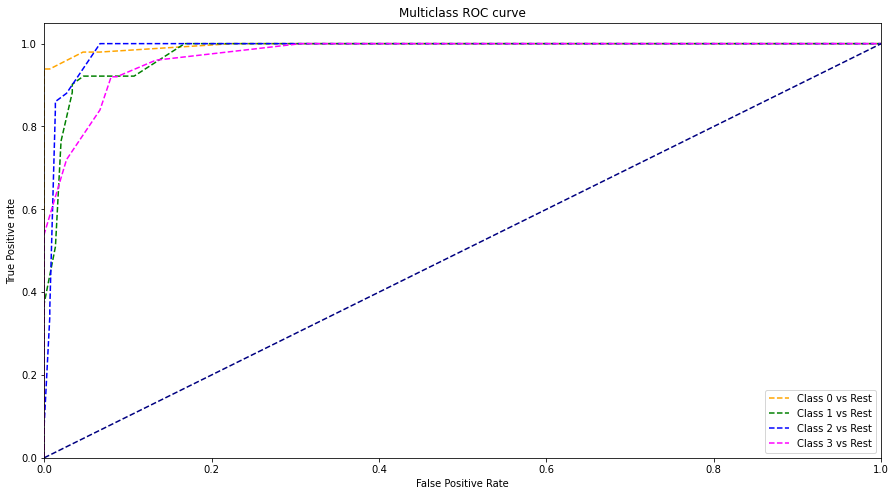

In [110]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


# Random Forest

In [111]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=101)

# fit
rfc.fit(X_train_cv,y_train_cv)

RandomForestClassifier(random_state=101)

In [112]:
# Making predictions
predictions = rfc.predict(X_test_cv)
pred_prob = rfc.predict_proba(X_test_cv)

In [113]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
precision=sklearn.metrics.precision_score(y_test_cv, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 100.00% 
Precision: 100.00% 
Recall: 100.00% 


In [114]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[49  0  0  0]
 [ 0 51  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


Accuracy    : 100.00% 
Sensitivity : 100.00% 
Specificity : 100.00% 


True Postive Rate : 100.00% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 100.00% 


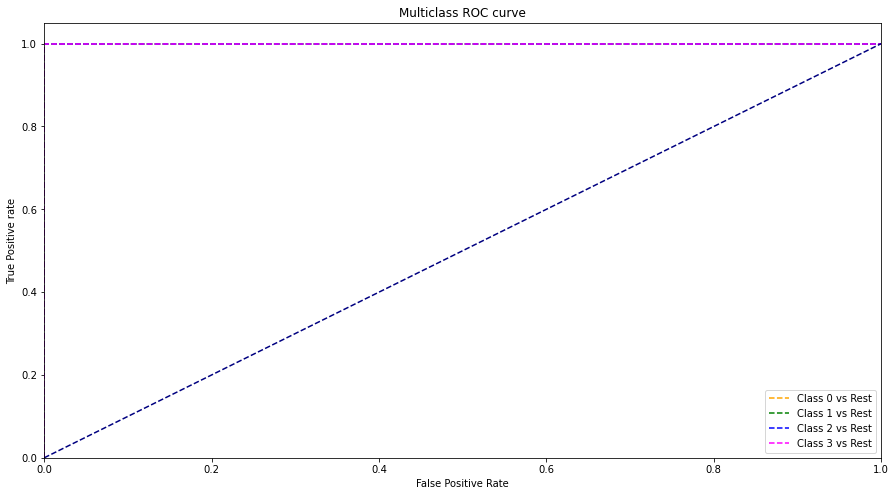

In [115]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [116]:
# Tuning max_features

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_features': [2,4,6,8,10,12,14,16,18,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]},
             return_train_score=True, scoring='accuracy')

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.187693      0.027001         0.009820        0.001398   
1       0.203664      0.003357         0.008127        0.000092   
2       0.245973      0.001708         0.008133        0.000304   
3       0.295835      0.002582         0.008417        0.000626   
4       0.343276      0.002044         0.007699        0.000290   

  param_max_features                params  split0_test_score  \
0                  2   {'max_features': 2}           0.757426   
1                  4   {'max_features': 4}           0.801980   
2                  6   {'max_features': 6}           0.806931   
3                  8   {'max_features': 8}           0.826733   
4                 10  {'max_features': 10}           0.816832   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.861386           0.762376           0.805970  ...   
1           0.861386           0.782178           0.830846  ...   
2           0.871287           0.782178           0.845771  ...   
3           0.861386           0.792079           0.845771  ...   
4           0.866337           0.806931           0.845771  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.802606        0.039160               10            0.986352   
1         0.819457        0.026777                9            0.992556   
2         0.823422        0.031366                8            0.993797   
3         0.830368        0.023233                4            0.992556   
4         0.828368        0.023828                6            0.995037   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.991315            0.988834            0.986369   
1            0.987593            0.986352            0.988848   
2            0.983871            0.987593            0.992565   
3            0.987593            0.988834            0.986369   
4            0.987593            0.990074            0.987608   

   split4_train_score  mean_train_score  std_train_score  
0            0.986369          0.987848         0.001980  
1            0.981413          0.987352         0.003624  
2            0.987608          0.989087         0.003630  
3            0.986369          0.988344         0.002295  
4            0.985130          0.989089         0.003360  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

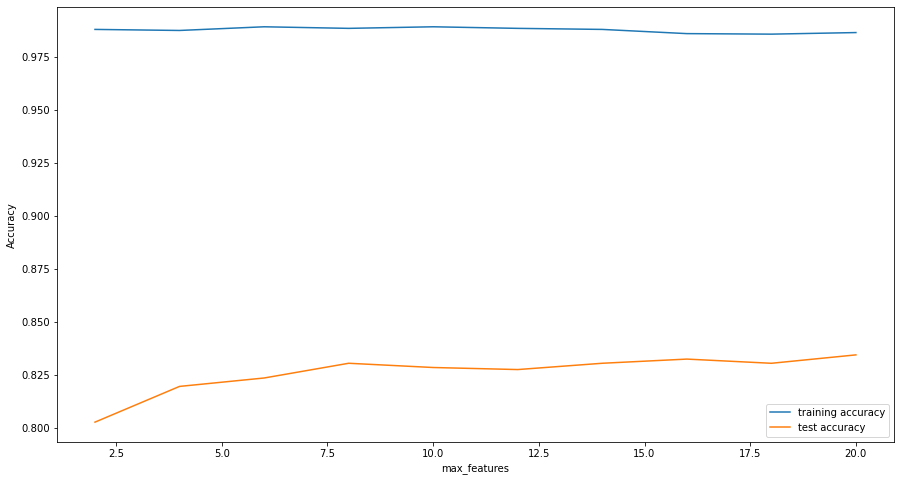

In [118]:
# plotting accuracies with max_features
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [119]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(0,5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(0, 5)},
             return_train_score=True, scoring='accuracy')

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.039963      0.001596         0.000000        0.000000   
1       0.228226      0.031925         0.009239        0.001243   
2       0.241328      0.024545         0.009586        0.001728   
3       0.194831      0.000828         0.008369        0.000549   
4       0.189995      0.001469         0.008069        0.000434   

  param_min_samples_leaf                   params  split0_test_score  \
0                      0  {'min_samples_leaf': 0}                NaN   
1                      1  {'min_samples_leaf': 1}           0.787129   
2                      2  {'min_samples_leaf': 2}           0.782178   
3                      3  {'min_samples_leaf': 3}           0.772277   
4                      4  {'min_samples_leaf': 4}           0.792079   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.876238           0.777228           0.840796  ...   
2           0.856436           0.777228           0.840796  ...   
3           0.861386           0.777228           0.825871  ...   
4           0.851485           0.772277           0.825871  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                5                 NaN   
1         0.817472        0.036524                1            1.000000   
2         0.813517        0.031279                2            0.987593   
3         0.807551        0.032987                4            0.959057   
4         0.812522        0.027583                3            0.921836   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            0.988834            0.986352            0.983891   
3            0.960298            0.946650            0.947955   
4            0.933002            0.924318            0.916976   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            0.988848          0.987104         0.001853  
3            0.956629          0.954118         0.005703  
4            0.935564          0.926339         0.006950  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

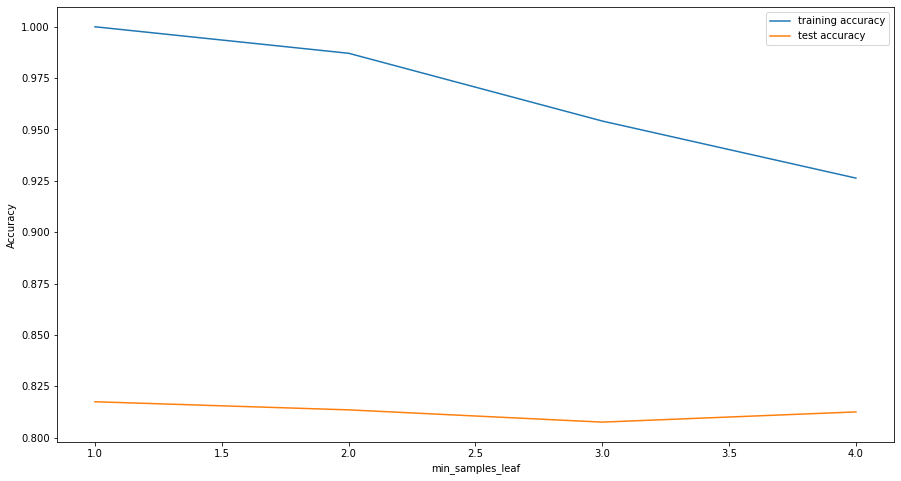

In [121]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [122]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1, 6)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(1, 6)},
             return_train_score=True, scoring='accuracy')

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.039113      0.000442         0.000000        0.000000   
1       0.248397      0.041335         0.009254        0.001532   
2       0.258019      0.036039         0.009203        0.001530   
3       0.241517      0.018985         0.010254        0.001574   
4       0.228188      0.019247         0.008420        0.000304   

  param_min_samples_split                    params  split0_test_score  \
0                       1  {'min_samples_split': 1}                NaN   
1                       2  {'min_samples_split': 2}           0.811881   
2                       3  {'min_samples_split': 3}           0.801980   
3                       4  {'min_samples_split': 4}           0.792079   
4                       5  {'min_samples_split': 5}           0.801980   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.856436           0.762376           0.850746  ...   
2           0.866337           0.777228           0.820896  ...   
3           0.861386           0.777228           0.845771  ...   
4           0.846535           0.777228           0.840796  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                5                 NaN   
1         0.819472        0.033688                1            1.000000   
2         0.818462        0.029410                2            1.000000   
3         0.816487        0.032004                4            0.998759   
4         0.817487        0.025534                3            0.997519   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            1.000000            0.996278            1.000000   
4            0.996278            1.000000            0.997522   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            0.998761          0.998760         0.001359  
4            0.993804          0.997024         0.002014  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

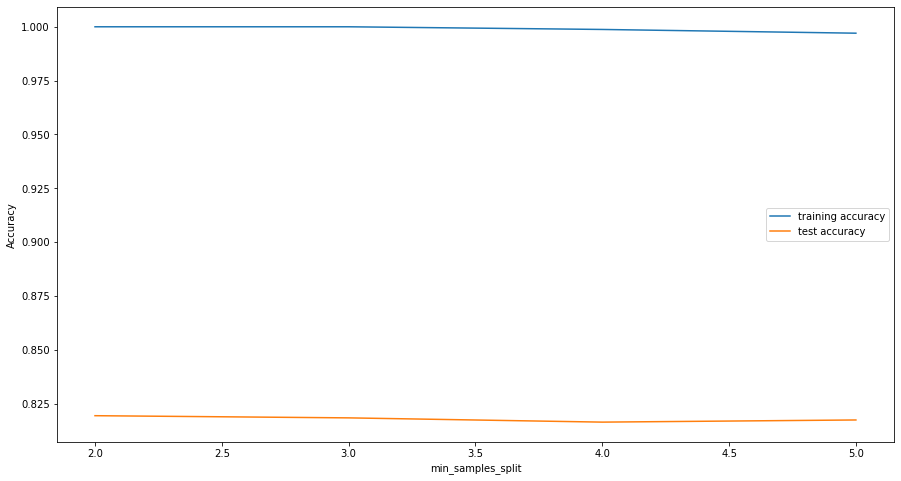

In [124]:
# plotting accuracies with min_samples_split
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [125]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,5,10],
    'min_samples_leaf': range(0,5),
    'min_samples_split': range(0,6),
    'n_estimators': [100,200, 300], 
    'max_features': [2,4,6,8,10,12,14,16,18,20]
    
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, return_train_score=True)

In [126]:
# Fit the grid search to the data
grid_search.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': range(0, 5),
                         'min_samples_split': range(0, 6),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [127]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8402886557312448 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [128]:
# Fitting the final model with the best parameters obtained from grid search.
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=3, 
                             min_samples_split=4,
                             max_features=20,
                             n_estimators=100)

In [129]:
rfc.fit(X_train_cv,y_train_cv)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=3,
                       min_samples_split=4)

In [130]:
# Making predictions
predictions = rfc.predict(X_test_cv)
pred_prob = rfc.predict_proba(X_test_cv)

In [131]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
precision=sklearn.metrics.precision_score(y_test_cv, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 97.50% 
Precision: 97.56% 
Recall: 97.50% 


In [132]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[48  0  1  0]
 [ 0 50  0  1]
 [ 0  0 50  0]
 [ 0  2  1 47]]


Accuracy    : 97.50% 
Sensitivity : 100.00% 
Specificity : 100.00% 


True Postive Rate : 100.00% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 100.00% 


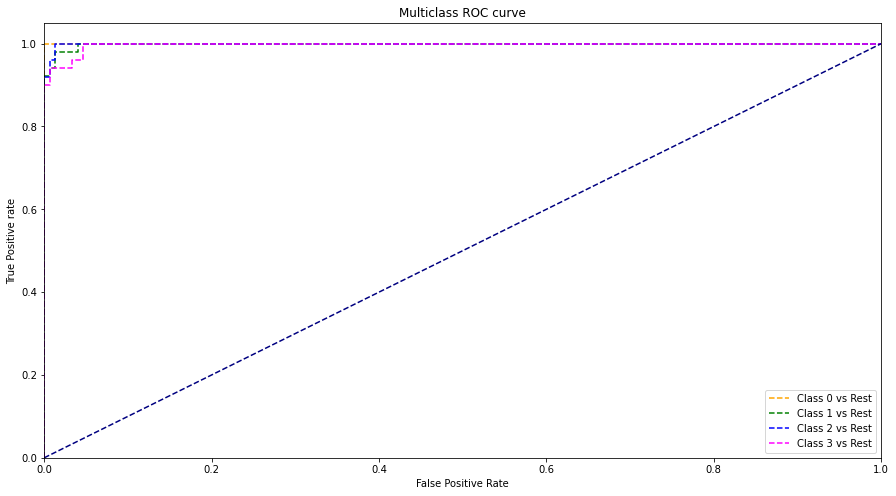

In [133]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

# XGBoost

In [134]:
# Fitting the decision tree with default hyperparameters, apart from
model = XGBClassifier()
eval_set=[(X_train_cv, y_train_cv), (X_test_cv, y_test_cv)]
model.fit(X_train_cv, y_train_cv, eval_metric="merror", eval_set=eval_set, verbose=True)


[0]	validation_0-merror:0.07738	validation_1-merror:0.04000
[1]	validation_0-merror:0.06944	validation_1-merror:0.03000
[2]	validation_0-merror:0.06250	validation_1-merror:0.03000
[3]	validation_0-merror:0.05952	validation_1-merror:0.02500
[4]	validation_0-merror:0.05159	validation_1-merror:0.02000
[5]	validation_0-merror:0.04564	validation_1-merror:0.01500
[6]	validation_0-merror:0.03770	validation_1-merror:0.01500
[7]	validation_0-merror:0.03274	validation_1-merror:0.01000
[8]	validation_0-merror:0.02480	validation_1-merror:0.00500
[9]	validation_0-merror:0.02282	validation_1-merror:0.00500
[10]	validation_0-merror:0.01389	validation_1-merror:0.00000
[11]	validation_0-merror:0.00794	validation_1-merror:0.00000
[12]	validation_0-merror:0.00496	validation_1-merror:0.00000
[13]	validation_0-merror:0.00198	validation_1-merror:0.00000
[14]	validation_0-merror:0.00198	validation_1-merror:0.00000
[15]	validation_0-merror:0.00099	validation_1-merror:0.00000
[16]	validation_0-merror:0.00099	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[17:27:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

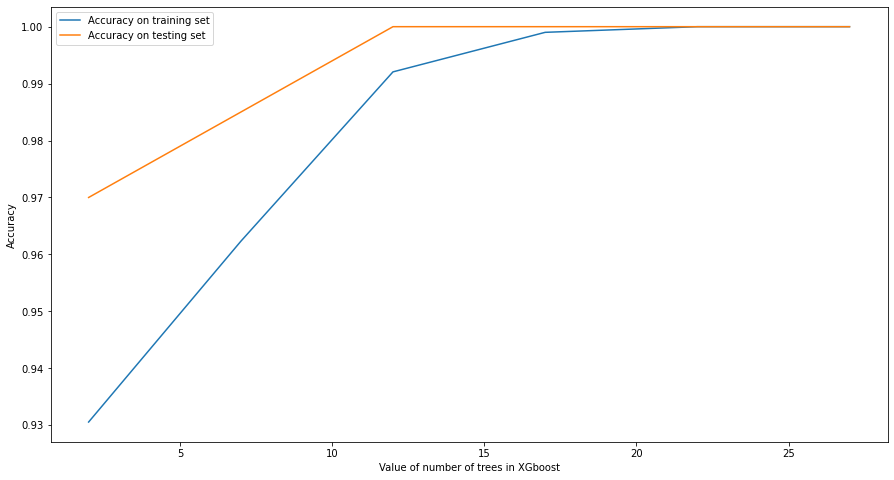

In [135]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_cv,y_train_cv)
    score1.append(xgb.score(X_train_cv,y_train_cv))
    score2.append(xgb.score(X_test_cv,y_test_cv))
    
%matplotlib inline
plt.subplots(figsize=(15,8))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [136]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_prediction = model.predict(X_test_cv)
y_pred = model.predict_proba(X_test_cv)
y_pred[:10]


array([[4.59276343e-04, 9.99165177e-01, 1.91530649e-04, 1.84071003e-04],
       [2.71951776e-05, 3.94443414e-05, 3.52104986e-03, 9.96412337e-01],
       [1.50558865e-03, 4.71118517e-04, 9.97749507e-01, 2.73815036e-04],
       [1.73507724e-03, 9.96032417e-01, 1.39728101e-04, 2.09280266e-03],
       [1.84777426e-03, 9.94812369e-01, 2.74891616e-04, 3.06495489e-03],
       [4.62862290e-03, 3.23437329e-04, 9.95008111e-01, 3.97748772e-05],
       [4.86631179e-05, 3.36334597e-05, 2.09880201e-03, 9.97818947e-01],
       [3.79228150e-04, 3.78506782e-04, 7.59635877e-04, 9.98482645e-01],
       [4.84563224e-03, 9.87902045e-01, 7.36439426e-04, 6.51587639e-03],
       [9.11063608e-03, 9.90605891e-01, 1.15590985e-04, 1.67852675e-04]],
      dtype=float32)

In [137]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_prediction)
precision=sklearn.metrics.precision_score(y_test_cv, y_prediction,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, y_prediction,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 100.00% 
Precision: 100.00% 
Recall: 100.00% 


In [138]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,y_prediction)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_prediction)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[49  0  0  0]
 [ 0 51  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


Accuracy    : 100.00% 
Sensitivity : 100.00% 
Specificity : 100.00% 


True Postive Rate : 100.00% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 100.00% 


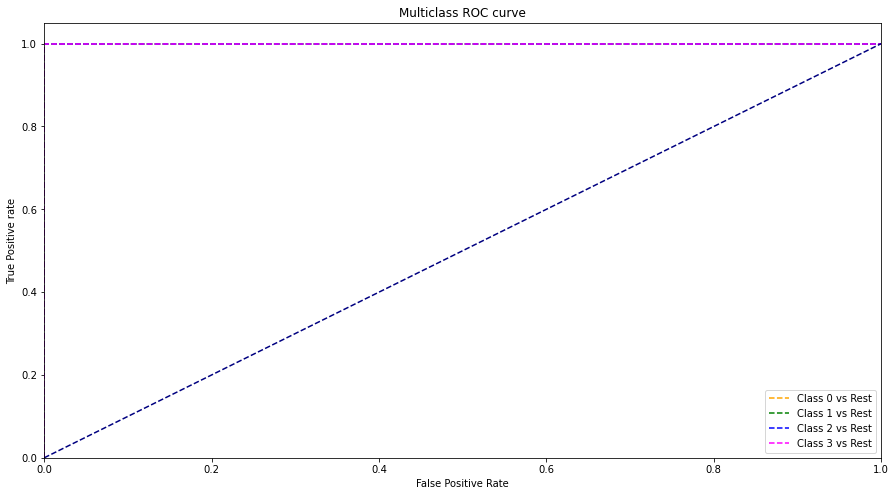

In [139]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_pred[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [140]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=10, objective='multi:softprob',n_estimators=100, num_class=4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid,
                        scoring= 'roc_auc_ovr', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)    



In [141]:
# fit the model
model_cv.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[17:29:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:29:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

[17:29:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   14.2s finished


[17:29:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=10, min_child_weight=None,
                                     missi...
                                     n_estimators=100, n_jobs=None, num_class=4,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=None,
                                     reg_l

In [142]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.413269      0.201706         0.004332        0.000492   
1       0.546699      0.185939         0.004054        0.000116   
2       0.583753      0.126643         0.004488        0.000368   
3       0.329348      0.147696         0.004378        0.000593   
4       0.363563      0.150923         0.004536        0.000374   
5       0.530620      0.155098         0.004670        0.000320   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.943804   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.953826   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.955495   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.944630   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.949002   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.951078   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.962420           0.936826  ...         0.950590        0.010179   
1           0.962137           0.941934  ...         0.955219        0.007745   
2           0.960619           0.941806  ...         0.955416        0.007710   
3           0.957468           0.924015  ...         0.940152        0.010925   
4           0.954594           0.939274  ...         0.950503        0.006911   
5           0.961476           0.938883  ...         0.951215        0.009508   

   rank_test_score  split0_train_score  split1_train_score  \
0                4                 1.0                 1.0   
1                2                 1.0                 1.0   
2                1                 1.0                 1.0   
3                6                 1.0                 1.0   
4                5                 1.0                 1.0   
5                3                 1.0                 1.0   

   split2_train_score  split3_train_score  split4_train_score  \
0                 1.0            0.999998                 1.0   
1                 1.0            1.000000                 1.0   
2                 1.0            1.000000                 1.0   
3                 1.0            1.000000                 1.0   
4                 1.0            1.000000                 1.0   
5                 1.0            1.000000                 1.0   

   mean_train_score  std_train_score  
0               1.0     8.209776e-07  
1               1.0     0.000000e+00  
2               1.0     0.000000e+00  
3               1.0     0.000000e+00  
4               1.0     0.000000e+00  
5               1.0     0.000000e+00  

[6 rows x 22 columns]

In [143]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.413269      0.201706         0.004332        0.000492   
1       0.546699      0.185939         0.004054        0.000116   
2       0.583753      0.126643         0.004488        0.000368   
3       0.329348      0.147696         0.004378        0.000593   
4       0.363563      0.150923         0.004536        0.000374   

   param_learning_rate param_subsample  \
0                  0.2             0.3   
1                  0.2             0.6   
2                  0.2             0.9   
3                  0.6             0.3   
4                  0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.943804   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.953826   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.955495   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.944630   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.949002   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.962420           0.936826  ...         0.950590        0.010179   
1           0.962137           0.941934  ...         0.955219        0.007745   
2           0.960619           0.941806  ...         0.955416        0.007710   
3           0.957468           0.924015  ...         0.940152        0.010925   
4           0.954594           0.939274  ...         0.950503        0.006911   

   rank_test_score  split0_train_score  split1_train_score  \
0                4                 1.0                 1.0   
1                2                 1.0                 1.0   
2                1                 1.0                 1.0   
3                6                 1.0                 1.0   
4                5                 1.0                 1.0   

   split2_train_score  split3_train_score  split4_train_score  \
0                 1.0            0.999998                 1.0   
1                 1.0            1.000000                 1.0   
2                 1.0            1.000000                 1.0   
3                 1.0            1.000000                 1.0   
4                 1.0            1.000000                 1.0   

   mean_train_score  std_train_score  
0               1.0     8.209776e-07  
1               1.0     0.000000e+00  
2               1.0     0.000000e+00  
3               1.0     0.000000e+00  
4               1.0     0.000000e+00  

[5 rows x 22 columns]

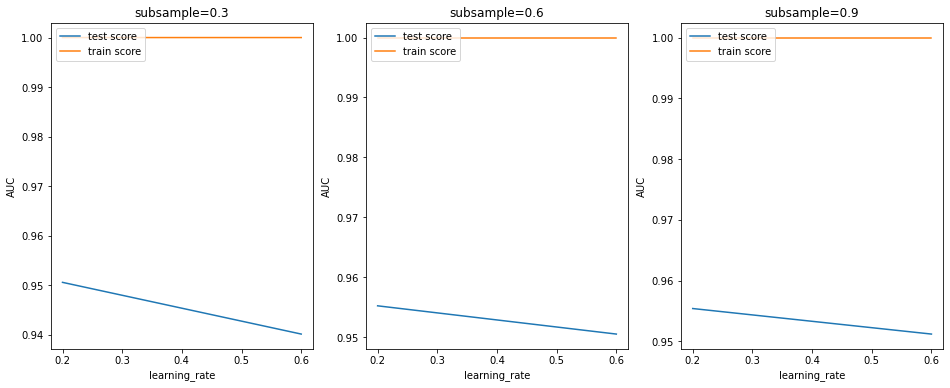

In [144]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    #plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.xscale('log')

In [145]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

#The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal.
#Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

params = {'learning_rate': 0.2,
          'max_depth': 10, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_cv, y_train_cv)


[17:29:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob',
              params={'learning_rate': 0.2, 'max_depth': 10,
                      'n_estimators': 100, 'objective': 'binary:logistic',
                      'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [146]:
y_prediction = model.predict(X_test_cv)
y_pred = model.predict_proba(X_test_cv)
y_pred[:10]

array([[4.59276343e-04, 9.99165177e-01, 1.91530649e-04, 1.84071003e-04],
       [2.71951776e-05, 3.94443414e-05, 3.52104986e-03, 9.96412337e-01],
       [1.50558865e-03, 4.71118517e-04, 9.97749507e-01, 2.73815036e-04],
       [1.73507724e-03, 9.96032417e-01, 1.39728101e-04, 2.09280266e-03],
       [1.84777426e-03, 9.94812369e-01, 2.74891616e-04, 3.06495489e-03],
       [4.62862290e-03, 3.23437329e-04, 9.95008111e-01, 3.97748772e-05],
       [4.86631179e-05, 3.36334597e-05, 2.09880201e-03, 9.97818947e-01],
       [3.79228150e-04, 3.78506782e-04, 7.59635877e-04, 9.98482645e-01],
       [4.84563224e-03, 9.87902045e-01, 7.36439426e-04, 6.51587639e-03],
       [9.11063608e-03, 9.90605891e-01, 1.15590985e-04, 1.67852675e-04]],
      dtype=float32)

In [147]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_prediction)
precision=sklearn.metrics.precision_score(y_test_cv, y_prediction,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, y_prediction,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 100.00% 
Precision: 100.00% 
Recall: 100.00% 


In [148]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,y_prediction)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_prediction)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[49  0  0  0]
 [ 0 51  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


Accuracy    : 100.00% 
Sensitivity : 100.00% 
Specificity : 100.00% 


True Postive Rate : 100.00% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 100.00% 


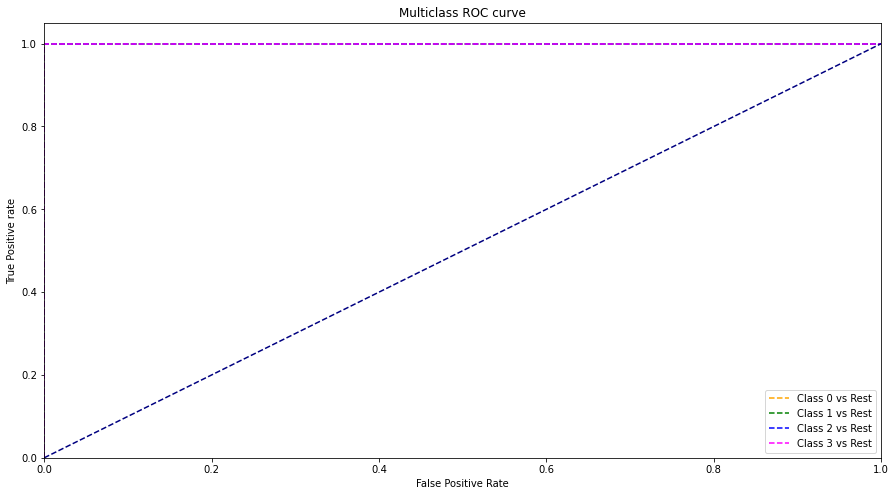

In [149]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_pred[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [150]:
# feature importance
importance = dict(zip(feature_cols.columns, model.feature_importances_))
importance

{'receipt_status': 0.015417041,
 'Contract_is_erc20': 0.01984818,
 'trace_from_address': 0.30285293,
 'trace_to_address': 0.020988906,
 'trace_value': 0.01886031,
 'trace_gas': 0.018382547,
 'trace_gas_used': 0.02325754,
 'token_transfer_from_address': 0.17961174,
 'token_transfer_to_address': 0.020642275,
 'token_transfer_value': 0.02000264,
 'transaction_from_address': 0.040582586,
 'transaction_to_address': 0.031445894,
 'transaction_value': 0.022260165,
 'transaction_gas': 0.016526146,
 'transaction_gas_price': 0.017752878,
 'receipt_cumulative_gas_used': 0.016377136,
 'receipt_gas_used': 0.021787534,
 'token_decimals': 0.15723588,
 'token_total_supply': 0.016343057,
 'Contract_address': 0.019824592}

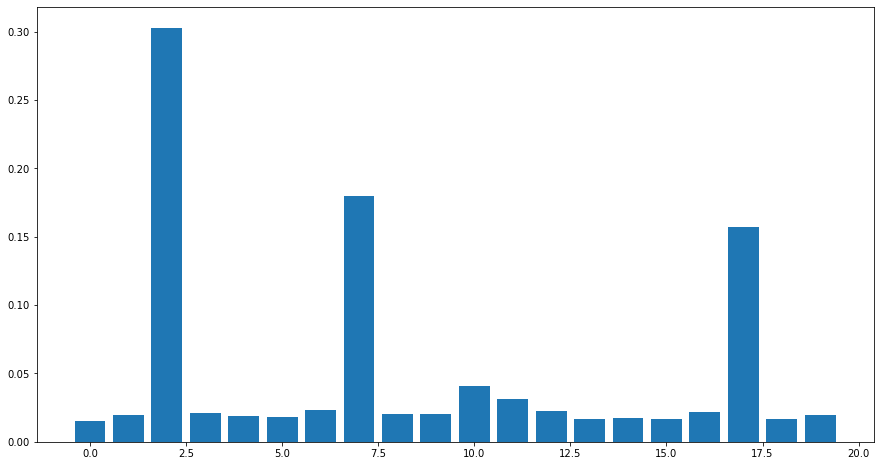

In [151]:
# plot
plt.subplots(figsize=(15,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# ADASYN

### Print the class distribution after applying ADASYN

In [152]:
# generate 4 class dataset
X, y = make_classification(n_classes=4, 
                           class_sep=2,
                           weights=[0.25,0.25,0.25,0.25], 
                           n_informative=3, 
                           n_redundant=1, 
                           flip_y=0,
                           n_features=20, 
                           n_clusters_per_class=1, 
                           n_samples=1000,
                           random_state=10)

#Code used to split the data set into data set Train and data set test of 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [153]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(sampling_strategy='minority')
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)



In [154]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
X_train_cv = X_train_adasyn
X_test_cv = X_test
y_train_cv = y_train_adasyn
y_test_cv = y_test

### Similarly explore other algorithms on balanced dataset by building models like:
- Decision Tree
- Random Forest
- XGBoost

In [155]:
# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_cv, y_train_cv)


DecisionTreeClassifier(max_depth=5)

In [156]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred_default = dt_default.predict(X_test_cv)
y_pred_prob = dt_default.predict_proba(X_test_cv)

# Printing classification report
print(classification_report(y_test_cv, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      0.98      0.97        53
           2       0.90      0.92      0.91        39
           3       0.92      0.91      0.92        54

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [157]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred_default)
precision=sklearn.metrics.precision_score(y_test_cv, y_pred_default,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, y_pred_default,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 95.00% 
Precision: 94.69% 
Recall: 94.83% 


In [158]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,y_pred_default)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred_default)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[53  1  0  0]
 [ 0 52  0  1]
 [ 0  0 36  3]
 [ 0  1  4 49]]


Accuracy    : 95.00% 
Sensitivity : 100.00% 
Specificity : 98.15% 


True Postive Rate : 100.00% 
False Postive Rate : 1.85% 
Positive Predictive Value : 98.11% 
Negative Predictive Value : 100.00% 


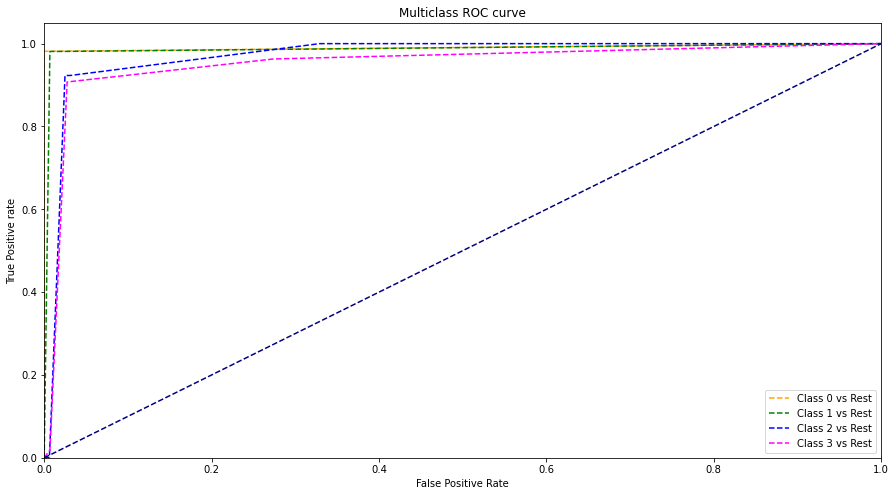

In [159]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [160]:
# Putting features
features = list(dfTrace.columns[1:21])
features

['receipt_status',
 'Contract_is_erc20',
 'trace_from_address',
 'trace_to_address',
 'trace_value',
 'trace_gas',
 'trace_gas_used',
 'token_transfer_from_address',
 'token_transfer_to_address',
 'token_transfer_value',
 'transaction_from_address',
 'transaction_to_address',
 'transaction_value',
 'transaction_gas',
 'transaction_gas_price',
 'receipt_cumulative_gas_used',
 'receipt_gas_used',
 'token_decimals',
 'token_total_supply',
 'Contract_address']

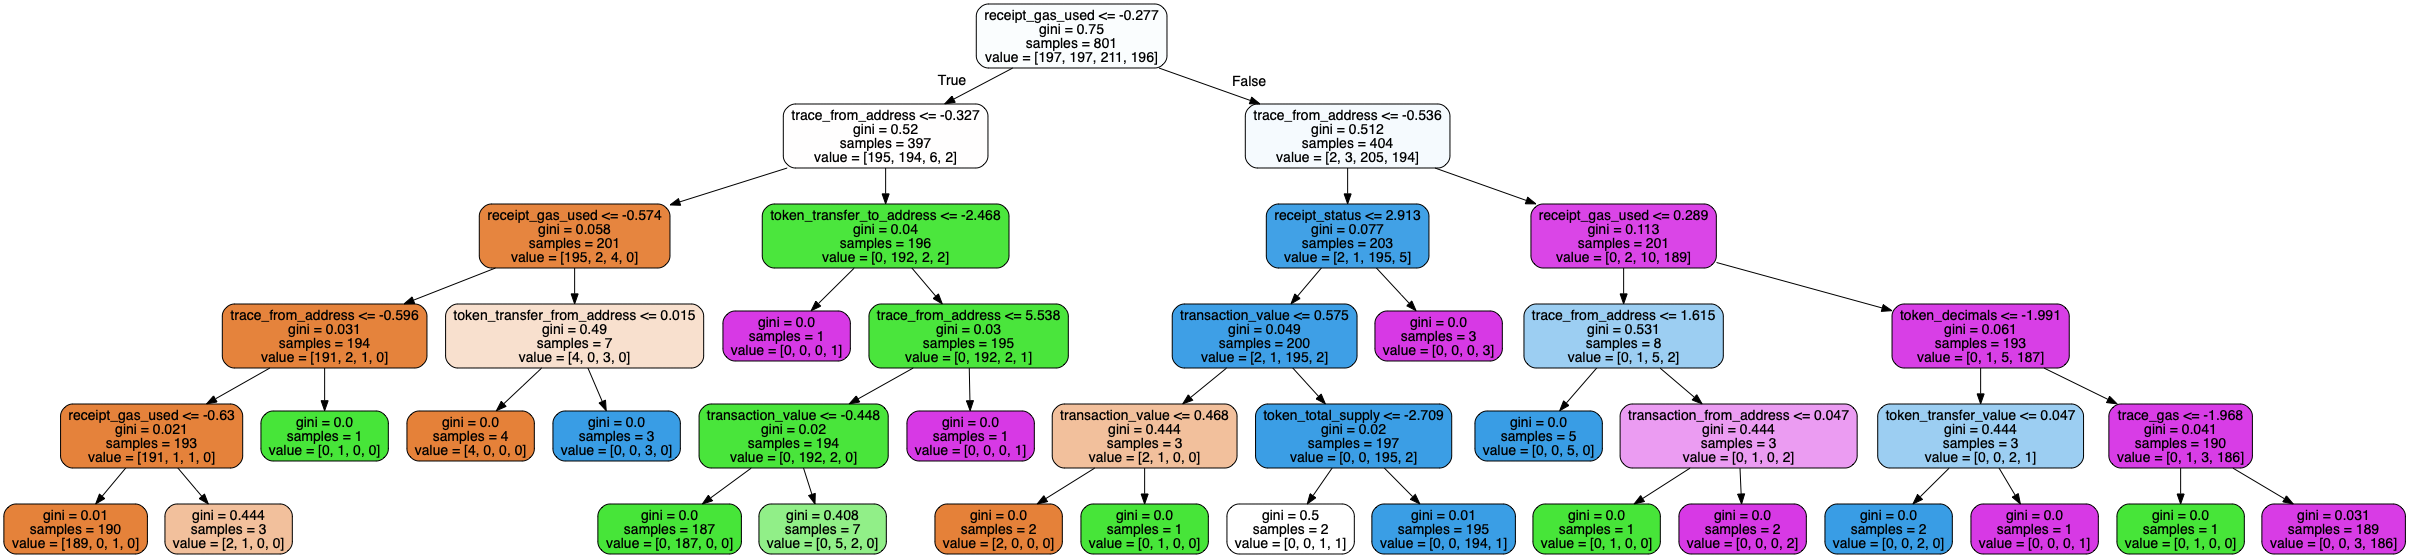

In [161]:
# plotting tree with max_depth=3

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [162]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = None)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [163]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001939      0.000267         0.000305        0.000056   
1       0.002956      0.000049         0.000286        0.000029   
2       0.004180      0.000130         0.000346        0.000051   
3       0.005322      0.000217         0.000330        0.000033   
4       0.005955      0.000211         0.000323        0.000044   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.509317            0.50000   
1               2  {'max_depth': 2}           0.956522            0.98125   
2               3  {'max_depth': 3}           0.962733            0.98125   
3               4  {'max_depth': 4}           0.956522            0.96250   
4               5  {'max_depth': 5}           0.962733            0.97500   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0            0.48750            0.49375  ...         0.495613        0.008272   
1            0.93750            0.95625  ...         0.958804        0.014022   
2            0.95000            0.96250  ...         0.961297        0.011462   
3            0.94375            0.96250  ...         0.955054        0.007299   
4            0.94375            0.92500  ...         0.950047        0.017264   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.496875            0.497660   
1                2            0.964063            0.956318   
2                1            0.970313            0.965679   
3                3            0.984375            0.982839   
4                5            0.992188            0.989080   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.502340            0.500780            0.502340   
1            0.968799            0.964119            0.962559   
2            0.976599            0.971919            0.978159   
3            0.985959            0.985959            0.987520   
4            0.993760            0.993760            0.993760   

   mean_train_score  std_train_score  
0          0.499999         0.002315  
1          0.963171         0.004017  
2          0.972534         0.004483  
3          0.985331         0.001594  
4          0.992509         0.001820  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

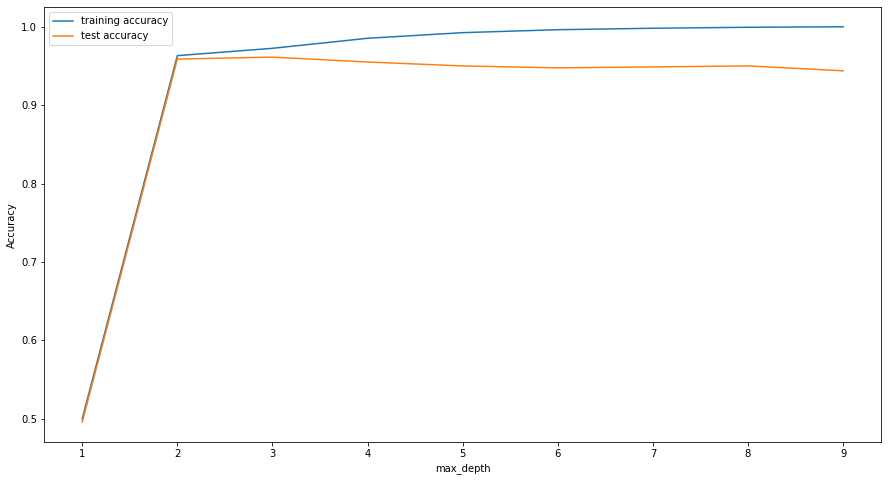

In [164]:
# plotting accuracies with max_depth
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [165]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(0,25)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(0, 25)},
             return_train_score=True, scoring='accuracy')

In [166]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000793      0.000275         0.000000        0.000000   
1       0.006968      0.000454         0.000338        0.000026   
2       0.006654      0.000243         0.000361        0.000025   
3       0.006442      0.000359         0.000320        0.000030   
4       0.006160      0.000307         0.000355        0.000052   

  param_min_samples_leaf                   params  split0_test_score  \
0                      0  {'min_samples_leaf': 0}                NaN   
1                      1  {'min_samples_leaf': 1}           0.944099   
2                      2  {'min_samples_leaf': 2}           0.950311   
3                      3  {'min_samples_leaf': 3}           0.968944   
4                      4  {'min_samples_leaf': 4}           0.962733   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1            0.96250            0.93750            0.92500  ...   
2            0.96250            0.94375            0.95000  ...   
3            0.97500            0.93750            0.95625  ...   
4            0.96875            0.93125            0.95000  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN               25                 NaN   
1         0.941320        0.012263               24            1.000000   
2         0.950062        0.006848               23            0.984375   
3         0.960039        0.012896                3            0.979688   
4         0.953797        0.012902               20            0.971875   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            0.987520            0.984399            0.985959   
3            0.978159            0.979719            0.979719   
4            0.971919            0.975039            0.968799   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            0.987520          0.985955         0.001401  
3            0.987520          0.980961         0.003334  
4            0.979719          0.973470         0.003696  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

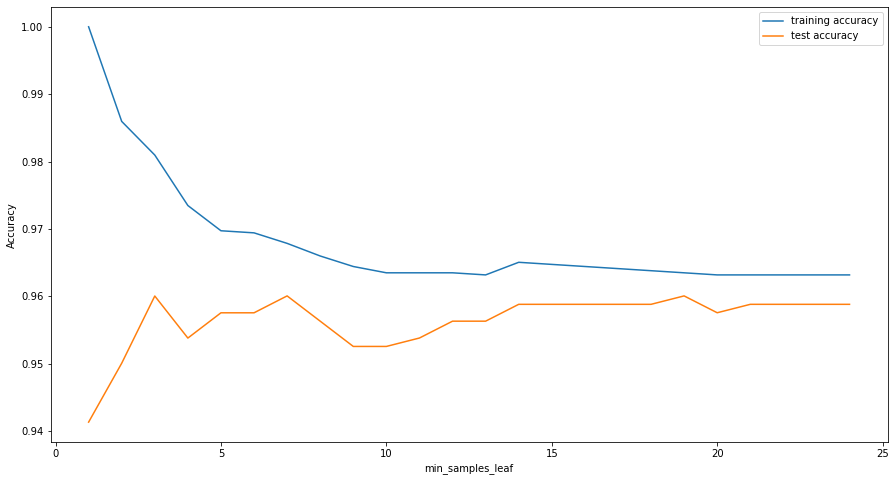

In [167]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [168]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1,50)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(1, 50)},
             return_train_score=True, scoring='accuracy')

In [169]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000783      0.000259         0.000000        0.000000   
1       0.007065      0.000444         0.000351        0.000028   
2       0.006925      0.000438         0.000323        0.000013   
3       0.006807      0.000411         0.000358        0.000078   
4       0.006821      0.000430         0.000336        0.000034   

  param_min_samples_split                    params  split0_test_score  \
0                       1  {'min_samples_split': 1}                NaN   
1                       2  {'min_samples_split': 2}           0.944099   
2                       3  {'min_samples_split': 3}           0.944099   
3                       4  {'min_samples_split': 4}           0.931677   
4                       5  {'min_samples_split': 5}           0.937888   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1            0.96250            0.93750              0.925  ...   
2            0.98125            0.94375              0.950  ...   
3            0.96875            0.93750              0.950  ...   
4            0.97500            0.94375              0.950  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN               49                 NaN   
1         0.941320        0.012263               48            1.000000   
2         0.952570        0.014536               45            1.000000   
3         0.947585        0.012762               47            0.993750   
4         0.951328        0.012664               46            0.992188   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1             1.00000            1.000000             1.00000   
2             0.99844            0.995320             0.99532   
3             0.99220            0.989080             0.99220   
4             0.99064            0.985959             0.99220   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1             1.00000          1.000000         0.000000  
2             0.99688          0.997192         0.001819  
3             0.99532          0.992510         0.002068  
4             0.99532          0.991261         0.003056  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

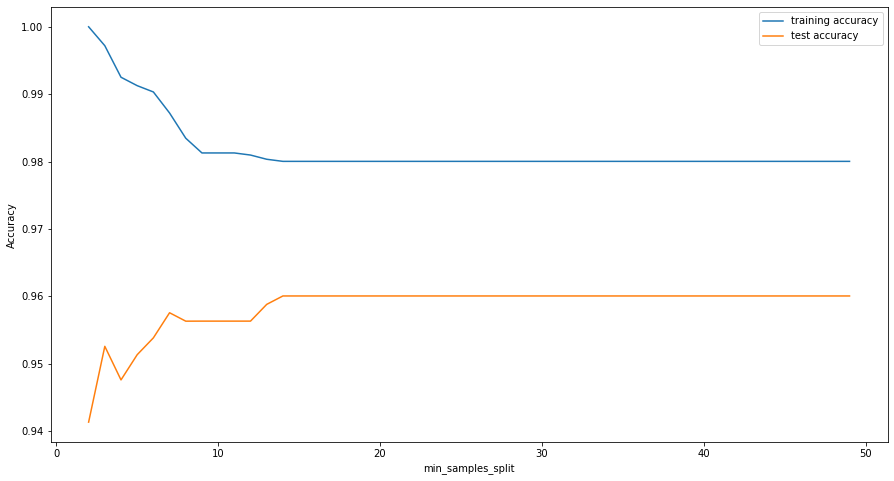

In [170]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [171]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 30, 5),
    'min_samples_leaf': range(0, 25, 5),
    'min_samples_split': range(1,50, 5),
    'criterion': ["entropy", "gini"]

}

n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_cv,y_train_cv)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   11.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 30, 5),
                         'min_samples_leaf': range(0, 25, 5),
                         'min_samples_split': range(1, 50, 5)},
             return_train_score=True, verbose=1)

In [172]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.000487      0.000223         0.000000        0.000000   
1         0.000365      0.000002         0.000000        0.000000   
2         0.000364      0.000003         0.000000        0.000000   
3         0.000445      0.000092         0.000000        0.000000   
4         0.000371      0.000004         0.000000        0.000000   
..             ...           ...              ...             ...   
495       0.003174      0.000138         0.000203        0.000025   
496       0.003192      0.000093         0.000191        0.000002   
497       0.003230      0.000230         0.000192        0.000007   
498       0.003263      0.000341         0.000207        0.000017   
499       0.003496      0.000273         0.000197        0.000013   

    param_criterion param_max_depth param_min_samples_leaf  \
0           entropy               5                      0   
1           entropy               5                      0   
2           entropy               5                      0   
3           entropy               5                      0   
4           entropy               5                      0   
..              ...             ...                    ...   
495            gini              25                     20   
496            gini              25                     20   
497            gini              25                     20   
498            gini              25                     20   
499            gini              25                     20   

    param_min_samples_split  \
0                         1   
1                         6   
2                        11   
3                        16   
4                        21   
..                      ...   
495                      26   
496                      31   
497                      36   
498                      41   
499                      46   

                                                params  split0_test_score  \
0    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
1    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
2    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
3    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
4    {'criterion': 'entropy', 'max_depth': 5, 'min_...                NaN   
..                                                 ...                ...   
495  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.956522   
496  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.956522   
497  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.956522   
498  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.956522   
499  {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.956522   

     ...  mean_test_score  std_test_score  rank_test_score  \
0    ...              NaN             NaN              500   
1    ...              NaN             NaN              382   
2    ...              NaN             NaN              381   
3    ...              NaN             NaN              380   
4    ...              NaN             NaN              379   
..   ...              ...             ...              ...   
495  ...         0.957554        0.012114              149   
496  ...         0.956304        0.010459              242   
497  ...         0.956304        0.010459              242   
498  ...         0.958804        0.014022                4   
499  ...         0.958804        0.014022                4   

     split0_train_score  split1_train_score  split2_train_score  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3                   NaN                 NaN                 NaN   
4                   NaN                 NaN          

In [173]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9600465838509316
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=11)


In [174]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 10,
                                  max_depth=5, 
                                  min_samples_leaf=5,
                                  min_samples_split=11)
clf_gini.fit(X_train_cv, y_train_cv)

# score
print(clf_gini.score(X_test_cv,y_test_cv))

0.96


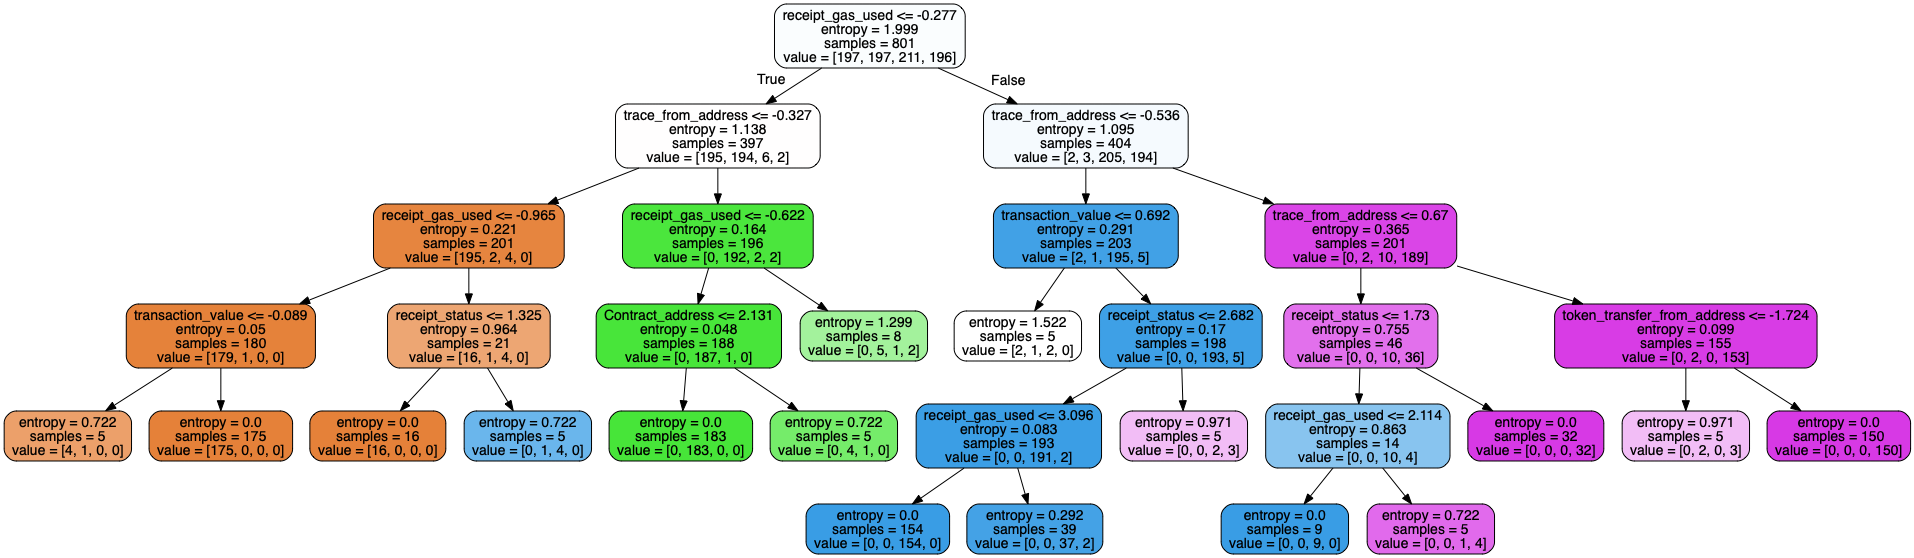

In [175]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [176]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred = clf_gini.predict(X_test_cv)
y_pred_prob = clf_gini.predict_proba(X_test_cv)

# Printing classification report
print(classification_report(y_test_cv, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.96      1.00      0.98        53
           2       0.92      0.92      0.92        39
           3       0.98      0.93      0.95        54

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [177]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
precision=sklearn.metrics.precision_score(y_test_cv, y_pred,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, y_pred,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 96.00% 
Precision: 95.77% 
Recall: 95.76% 


In [178]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,y_pred)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[53  1  0  0]
 [ 0 53  0  0]
 [ 2  0 36  1]
 [ 0  1  3 50]]


Accuracy    : 96.00% 
Sensitivity : 100.00% 
Specificity : 98.15% 


True Postive Rate : 100.00% 
False Postive Rate : 1.85% 
Positive Predictive Value : 98.15% 
Negative Predictive Value : 100.00% 


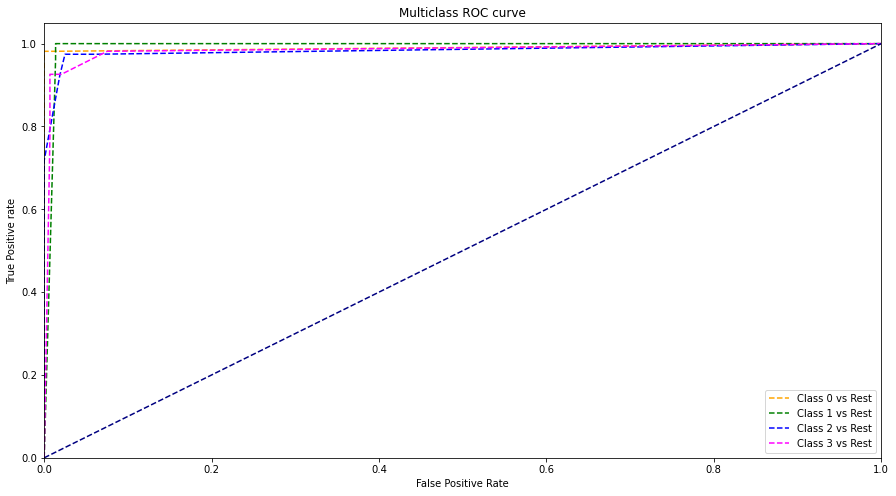

In [179]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

# Random Forest

In [180]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_cv,y_train_cv)


RandomForestClassifier()

In [181]:
# Making predictions
predictions = rfc.predict(X_test_cv)
pred_prob = rfc.predict_proba(X_test_cv)

In [182]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
precision=sklearn.metrics.precision_score(y_test_cv, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 96.00% 
Precision: 95.67% 
Recall: 95.94% 


In [183]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[53  1  0  0]
 [ 0 53  0  0]
 [ 0  0 37  2]
 [ 0  1  4 49]]


Accuracy    : 96.00% 
Sensitivity : 100.00% 
Specificity : 98.15% 


True Postive Rate : 100.00% 
False Postive Rate : 1.85% 
Positive Predictive Value : 98.15% 
Negative Predictive Value : 100.00% 


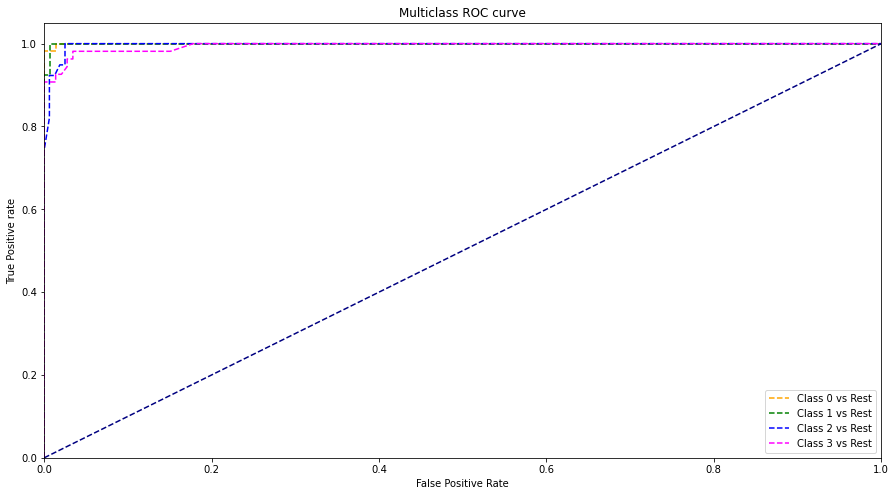

In [184]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [185]:
# Tuning max_features

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_features': [2,4,6,8,10,12,14,16,18,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]},
             return_train_score=True, scoring='accuracy')

In [186]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.152107      0.018240         0.009681        0.001820   
1       0.146734      0.002708         0.007424        0.000317   
2       0.165279      0.001638         0.007396        0.000269   
3       0.218772      0.034917         0.009388        0.001573   
4       0.233855      0.030597         0.007644        0.001401   

  param_max_features                params  split0_test_score  \
0                  2   {'max_features': 2}           0.956522   
1                  4   {'max_features': 4}           0.956522   
2                  6   {'max_features': 6}           0.956522   
3                  8   {'max_features': 8}           0.962733   
4                 10  {'max_features': 10}           0.962733   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0            0.97500            0.95625            0.93125  ...   
1            0.98125            0.93750            0.94375  ...   
2            0.98750            0.93750            0.95625  ...   
3            0.98750            0.94375            0.96875  ...   
4            0.97500            0.95000            0.97500  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.955054        0.013925               10            0.975000   
1         0.957554        0.016004                9            0.981250   
2         0.957554        0.016485                8            0.990625   
3         0.962547        0.015310                2            0.989062   
4         0.962547        0.011181                2            0.995313   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.970359            0.975039            0.971919   
1            0.978159            0.981279            0.971919   
2            0.987520            0.989080            0.984399   
3            0.989080            0.990640            0.989080   
4            0.990640            0.995320            0.993760   

   split4_train_score  mean_train_score  std_train_score  
0            0.971919          0.972847         0.001863  
1            0.978159          0.978153         0.003413  
2            0.987520          0.987829         0.002066  
3            0.993760          0.990324         0.001822  
4            0.990640          0.993134         0.002115  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

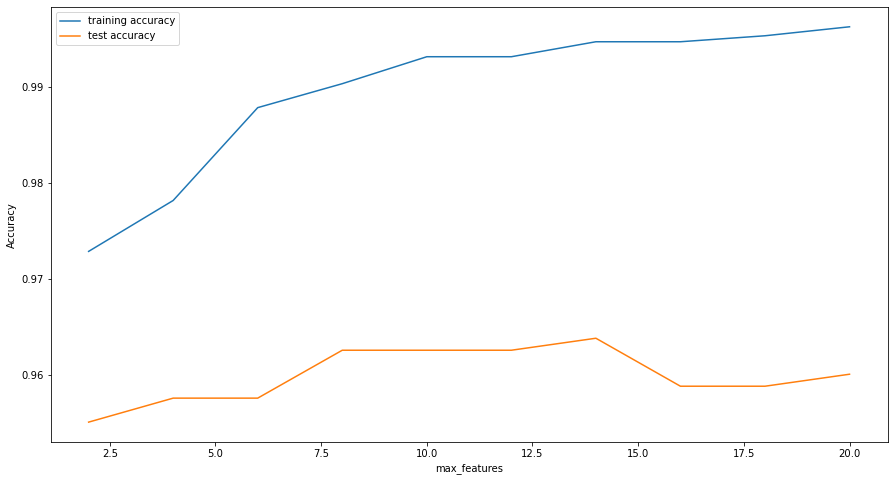

In [187]:
# plotting accuracies with max_features
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [188]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(0,5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(0, 5)},
             return_train_score=True, scoring='accuracy')

In [189]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.038542      0.002162         0.000000        0.000000   
1       0.198144      0.029968         0.009103        0.001427   
2       0.197608      0.026108         0.009935        0.001173   
3       0.171202      0.022582         0.008700        0.001171   
4       0.177710      0.013652         0.008835        0.001275   

  param_min_samples_leaf                   params  split0_test_score  \
0                      0  {'min_samples_leaf': 0}                NaN   
1                      1  {'min_samples_leaf': 1}           0.956522   
2                      2  {'min_samples_leaf': 2}           0.956522   
3                      3  {'min_samples_leaf': 3}           0.956522   
4                      4  {'min_samples_leaf': 4}           0.956522   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1            0.98125            0.94375            0.96250  ...   
2            0.98750            0.95625            0.95625  ...   
3            0.98750            0.94375            0.96875  ...   
4            0.98750            0.95000            0.95625  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                5                 NaN   
1         0.958804        0.012859                4            1.000000   
2         0.960054        0.014564                2            0.992188   
3         0.963804        0.014442                1            0.984375   
4         0.960054        0.014017                2            0.979688   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            1.000000            1.000000            1.000000   
2            0.996880            0.993760            0.993760   
3            0.981279            0.985959            0.985959   
4            0.982839            0.978159            0.978159   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            1.000000          1.000000         0.000000  
2            0.996880          0.994693         0.001875  
3            0.989080          0.985331         0.002537  
4            0.976599          0.979089         0.002114  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

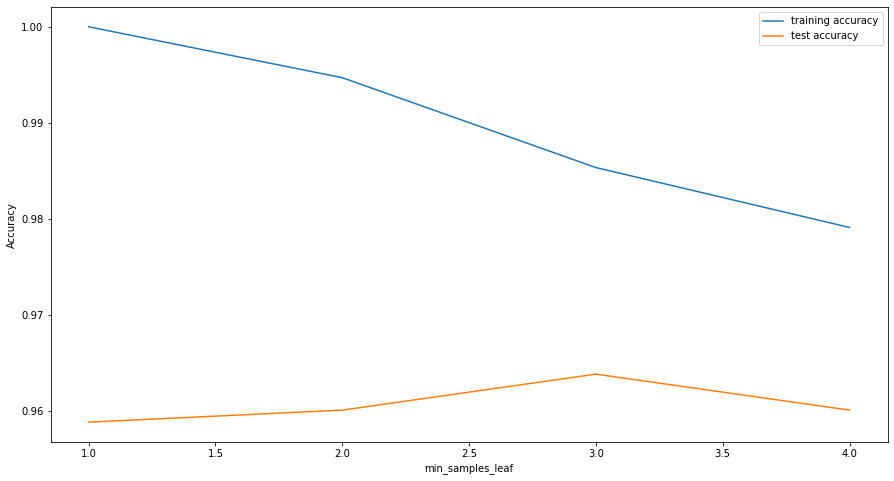

In [190]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [191]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(0,6)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(0, 6)},
             return_train_score=True, scoring='accuracy')

In [192]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.038756      0.001017         0.000000        0.000000   
1       0.038570      0.000518         0.000000        0.000000   
2       0.163732      0.014111         0.007424        0.000285   
3       0.186780      0.024896         0.008756        0.001248   
4       0.183755      0.023901         0.008506        0.001493   

  param_min_samples_split                    params  split0_test_score  \
0                       0  {'min_samples_split': 0}                NaN   
1                       1  {'min_samples_split': 1}                NaN   
2                       2  {'min_samples_split': 2}           0.956522   
3                       3  {'min_samples_split': 3}           0.956522   
4                       4  {'min_samples_split': 4}           0.956522   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1                NaN                NaN                NaN  ...   
2             0.9875            0.94375            0.96875  ...   
3             0.9875            0.94375            0.96875  ...   
4             0.9875            0.94375            0.95625  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                5                 NaN   
1              NaN             NaN                6                 NaN   
2         0.963804        0.014442                1                 1.0   
3         0.961304        0.015495                2                 1.0   
4         0.960054        0.014564                3                 1.0   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 1.0                 1.0                 1.0   
3                 1.0                 1.0                 1.0   
4                 1.0                 1.0                 1.0   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1                 NaN               NaN              NaN  
2                 1.0               1.0              0.0  
3                 1.0               1.0              0.0  
4                 1.0               1.0              0.0  

[5 rows x 21 columns]

<Figure size 432x288 with 0 Axes>

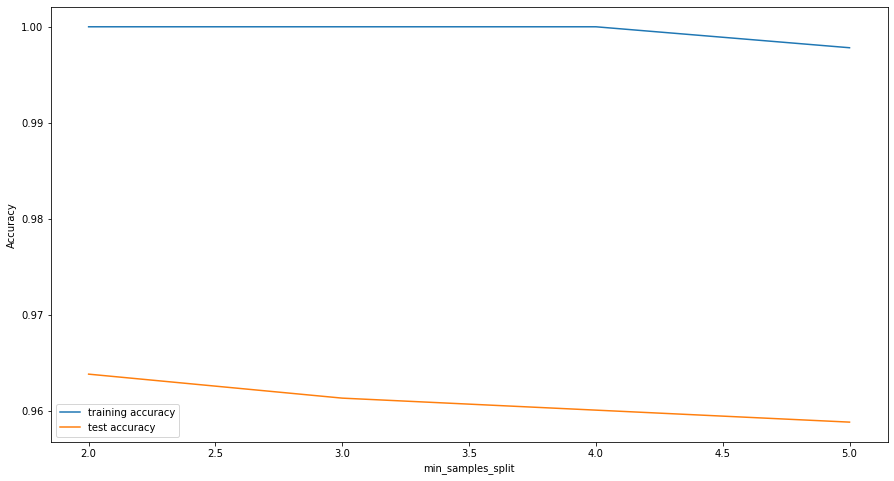

In [193]:
# plotting accuracies with min_samples_split
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [194]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,5,10],
    'min_samples_leaf': range(0,5),
    'min_samples_split': range(0,6),
    'n_estimators': [100,200,300], 
    'max_features': [2,4,6,8,10,12,14,16,18,20]
    
    
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, return_train_score=True)

In [195]:
# Fit the grid search to the data
grid_search.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': range(0, 5),
                         'min_samples_split': range(0, 6),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [196]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.965054347826087 using {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [197]:
# Fitting the final model with the best parameters obtained from grid search.
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=1, 
                             min_samples_split=5,
                             max_features=2,
                             n_estimators=100)

In [198]:
rfc.fit(X_train_cv,y_train_cv)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=5)

In [199]:
# Making predictions
predictions = rfc.predict(X_test_cv)
pred_prob = rfc.predict_proba(X_test_cv)

In [200]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
precision=sklearn.metrics.precision_score(y_test_cv, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 96.00% 
Precision: 95.67% 
Recall: 95.94% 


In [201]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[53  1  0  0]
 [ 0 53  0  0]
 [ 0  0 37  2]
 [ 0  1  4 49]]


Accuracy    : 96.00% 
Sensitivity : 100.00% 
Specificity : 98.15% 


True Postive Rate : 100.00% 
False Postive Rate : 1.85% 
Positive Predictive Value : 98.15% 
Negative Predictive Value : 100.00% 


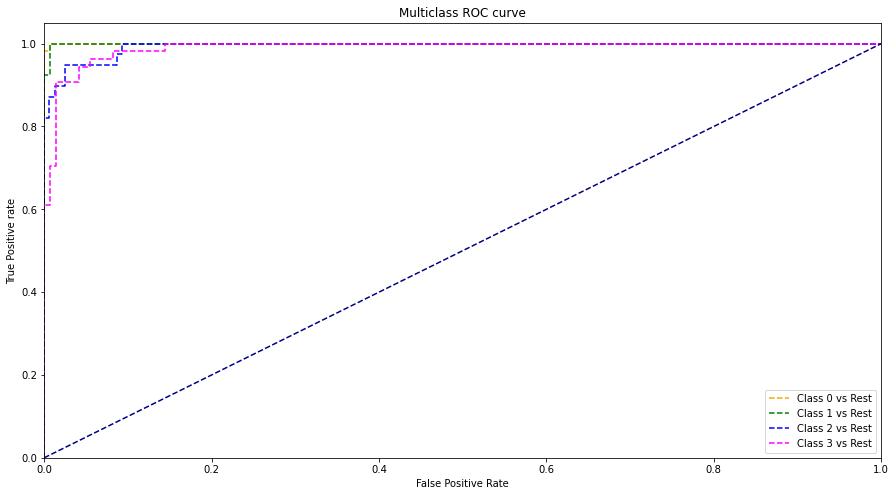

In [202]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

# XGBoost

In [203]:
# Fitting the decision tree with default hyperparameters, apart from
model = XGBClassifier()
eval_set=[(X_train_cv, y_train_cv), (X_test_cv, y_test_cv)]
model.fit(X_train_cv, y_train_cv,eval_metric="merror", eval_set=eval_set, verbose=True)


[0]	validation_0-merror:0.00999	validation_1-merror:0.03500
[1]	validation_0-merror:0.00999	validation_1-merror:0.03500
[2]	validation_0-merror:0.00999	validation_1-merror:0.03500
[3]	validation_0-merror:0.00874	validation_1-merror:0.03500
[4]	validation_0-merror:0.00749	validation_1-merror:0.03500
[5]	validation_0-merror:0.00749	validation_1-merror:0.03500
[6]	validation_0-merror:0.00499	validation_1-merror:0.03500
[7]	validation_0-merror:0.00499	validation_1-merror:0.03000
[8]	validation_0-merror:0.00499	validation_1-merror:0.03000
[9]	validation_0-merror:0.00125	validation_1-merror:0.03000
[10]	validation_0-merror:0.00125	validation_1-merror:0.03000
[11]	validation_0-merror:0.00000	validation_1-merror:0.03000
[12]	validation_0-merror:0.00000	validation_1-merror:0.03000
[13]	validation_0-merror:0.00000	validation_1-merror:0.03000
[14]	validation_0-merror:0.00000	validation_1-merror:0.03000
[15]	validation_0-merror:0.00000	validation_1-merror:0.03000
[16]	validation_0-merror:0.00000	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[17:59:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

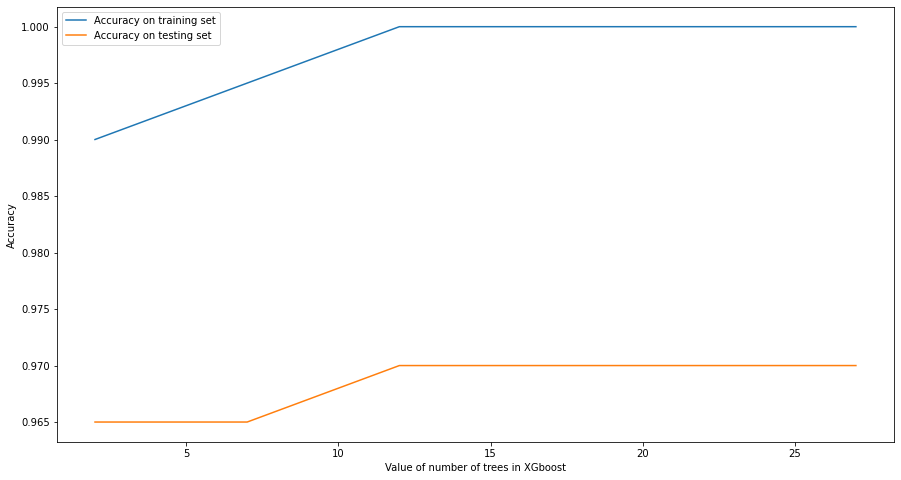

In [204]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_cv,y_train_cv)
    score1.append(xgb.score(X_train_cv,y_train_cv))
    score2.append(xgb.score(X_test_cv,y_test_cv))
    
%matplotlib inline
plt.subplots(figsize=(15,8))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [205]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_prediction = model.predict(X_test_cv)
y_pred = model.predict_proba(X_test_cv)
y_pred[:10]


array([[9.9779046e-01, 1.0242397e-03, 9.7101787e-04, 2.1422864e-04],
       [9.9872285e-01, 4.2240496e-04, 7.8008481e-04, 7.4595860e-05],
       [1.8374113e-04, 9.9928635e-01, 1.7244938e-04, 3.5754021e-04],
       [2.0658270e-04, 9.9958724e-01, 8.2258295e-05, 1.2387948e-04],
       [1.7697390e-04, 9.9940217e-01, 2.8147968e-04, 1.3932487e-04],
       [1.2147924e-04, 4.4578617e-05, 2.5448806e-04, 9.9957949e-01],
       [2.8938297e-04, 5.7018193e-04, 5.9667771e-04, 9.9854374e-01],
       [9.9751979e-01, 7.8011391e-04, 1.5998299e-03, 1.0026164e-04],
       [1.8453527e-04, 2.7467316e-04, 1.7993366e-04, 9.9936086e-01],
       [6.1000662e-04, 2.1239455e-04, 9.9802089e-01, 1.1567239e-03]],
      dtype=float32)

In [206]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_prediction)
precision=sklearn.metrics.precision_score(y_test_cv, y_prediction,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, y_prediction,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 97.00% 
Precision: 96.77% 
Recall: 97.04% 


In [207]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,y_prediction)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_prediction)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[53  1  0  0]
 [ 0 53  0  0]
 [ 0  0 38  1]
 [ 0  1  3 50]]


Accuracy    : 97.00% 
Sensitivity : 100.00% 
Specificity : 98.15% 


True Postive Rate : 100.00% 
False Postive Rate : 1.85% 
Positive Predictive Value : 98.15% 
Negative Predictive Value : 100.00% 


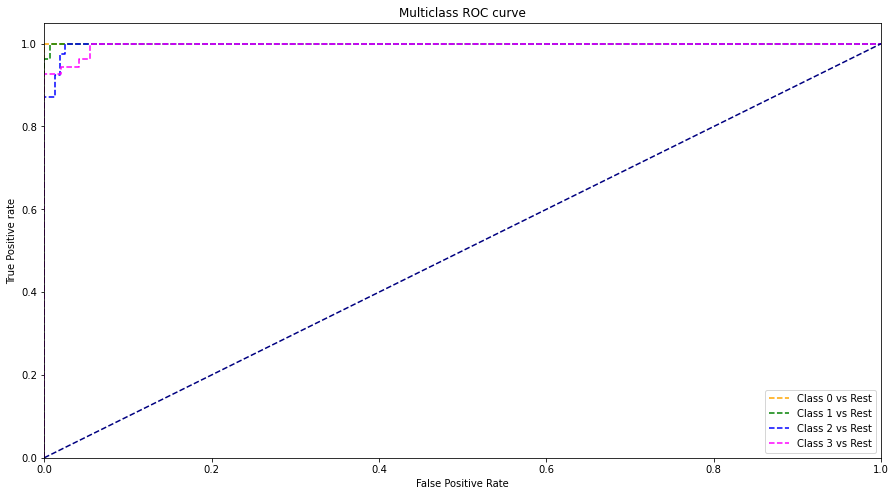

In [208]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_pred[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [209]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=10, objective='multi:softprob',n_estimators=100, num_class=4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid,
                        scoring= 'roc_auc_ovr', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [210]:
# fit the model
model_cv.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[18:00:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[18:00:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

[18:01:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:01:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.5s finished


[18:01:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=10, min_child_weight=None,
                                     missi...
                                     n_estimators=100, n_jobs=None, num_class=4,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=None,
                                     reg_l

In [211]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.289503      0.045461         0.004199        0.000531   
1       0.205033      0.074271         0.003528        0.000245   
2       0.178478      0.037349         0.003659        0.000245   
3       0.233818      0.022315         0.004180        0.000407   
4       0.242833      0.039124         0.004506        0.000286   
5       0.284081      0.017185         0.004367        0.000409   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.995215   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.995895   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.995083   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.994138   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.995769   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.993992   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.999530           0.993682  ...         0.995310        0.002725   
1           0.999689           0.995071  ...         0.995672        0.002989   
2           0.999685           0.994692  ...         0.995470        0.003624   
3           0.999636           0.992016  ...         0.993491        0.004107   
4           0.999530           0.990704  ...         0.994844        0.003362   
5           0.999579           0.995377  ...         0.995430        0.003253   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999994             0.99999   
1                1            1.000000             1.00000   
2                2            1.000000             1.00000   
3                6            1.000000             1.00000   
4                5            1.000000             1.00000   
5                3            1.000000             1.00000   

   split2_train_score  split3_train_score  split4_train_score  \
0             0.99999                 1.0                 1.0   
1             1.00000                 1.0                 1.0   
2             1.00000                 1.0                 1.0   
3             1.00000                 1.0                 1.0   
4             1.00000                 1.0                 1.0   
5             1.00000                 1.0                 1.0   

   mean_train_score  std_train_score  
0          0.999995         0.000004  
1          1.000000         0.000000  
2          1.000000         0.000000  
3          1.000000         0.000000  
4          1.000000         0.000000  
5          1.000000         0.000000  

[6 rows x 22 columns]

In [212]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.289503      0.045461         0.004199        0.000531   
1       0.205033      0.074271         0.003528        0.000245   
2       0.178478      0.037349         0.003659        0.000245   
3       0.233818      0.022315         0.004180        0.000407   
4       0.242833      0.039124         0.004506        0.000286   

   param_learning_rate param_subsample  \
0                  0.2             0.3   
1                  0.2             0.6   
2                  0.2             0.9   
3                  0.6             0.3   
4                  0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.995215   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.995895   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.995083   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.994138   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.995769   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.999530           0.993682  ...         0.995310        0.002725   
1           0.999689           0.995071  ...         0.995672        0.002989   
2           0.999685           0.994692  ...         0.995470        0.003624   
3           0.999636           0.992016  ...         0.993491        0.004107   
4           0.999530           0.990704  ...         0.994844        0.003362   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999994             0.99999   
1                1            1.000000             1.00000   
2                2            1.000000             1.00000   
3                6            1.000000             1.00000   
4                5            1.000000             1.00000   

   split2_train_score  split3_train_score  split4_train_score  \
0             0.99999                 1.0                 1.0   
1             1.00000                 1.0                 1.0   
2             1.00000                 1.0                 1.0   
3             1.00000                 1.0                 1.0   
4             1.00000                 1.0                 1.0   

   mean_train_score  std_train_score  
0          0.999995         0.000004  
1          1.000000         0.000000  
2          1.000000         0.000000  
3          1.000000         0.000000  
4          1.000000         0.000000  

[5 rows x 22 columns]

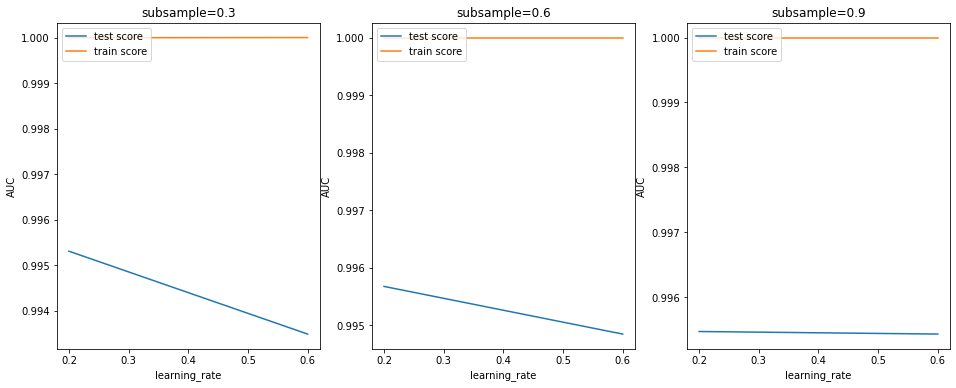

In [213]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    #plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.xscale('log')

In [214]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

#The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal.
#Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

params = {'learning_rate': 0.2,
          'max_depth': 10, 
          'n_estimators':100,
          'subsample':0.6,
         'objective':'binary:logistic'}


# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_cv, y_train_cv)

[18:01:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:01:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob',
              params={'learning_rate': 0.2, 'max_depth': 10,
                      'n_estimators': 100, 'objective': 'binary:logistic',
                      'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [215]:
y_pred = model.predict_proba(X_test_cv)
predictions = model.predict(X_test_cv)
y_pred[:10]

array([[9.9779046e-01, 1.0242397e-03, 9.7101787e-04, 2.1422864e-04],
       [9.9872285e-01, 4.2240496e-04, 7.8008481e-04, 7.4595860e-05],
       [1.8374113e-04, 9.9928635e-01, 1.7244938e-04, 3.5754021e-04],
       [2.0658270e-04, 9.9958724e-01, 8.2258295e-05, 1.2387948e-04],
       [1.7697390e-04, 9.9940217e-01, 2.8147968e-04, 1.3932487e-04],
       [1.2147924e-04, 4.4578617e-05, 2.5448806e-04, 9.9957949e-01],
       [2.8938297e-04, 5.7018193e-04, 5.9667771e-04, 9.9854374e-01],
       [9.9751979e-01, 7.8011391e-04, 1.5998299e-03, 1.0026164e-04],
       [1.8453527e-04, 2.7467316e-04, 1.7993366e-04, 9.9936086e-01],
       [6.1000662e-04, 2.1239455e-04, 9.9802089e-01, 1.1567239e-03]],
      dtype=float32)

In [216]:
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
precision=sklearn.metrics.precision_score(y_test_cv, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 97.00% 
Precision: 96.77% 
Recall: 97.04% 


In [217]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[53  1  0  0]
 [ 0 53  0  0]
 [ 0  0 38  1]
 [ 0  1  3 50]]


Accuracy    : 97.00% 
Sensitivity : 100.00% 
Specificity : 98.15% 


True Postive Rate : 100.00% 
False Postive Rate : 1.85% 
Positive Predictive Value : 98.15% 
Negative Predictive Value : 100.00% 


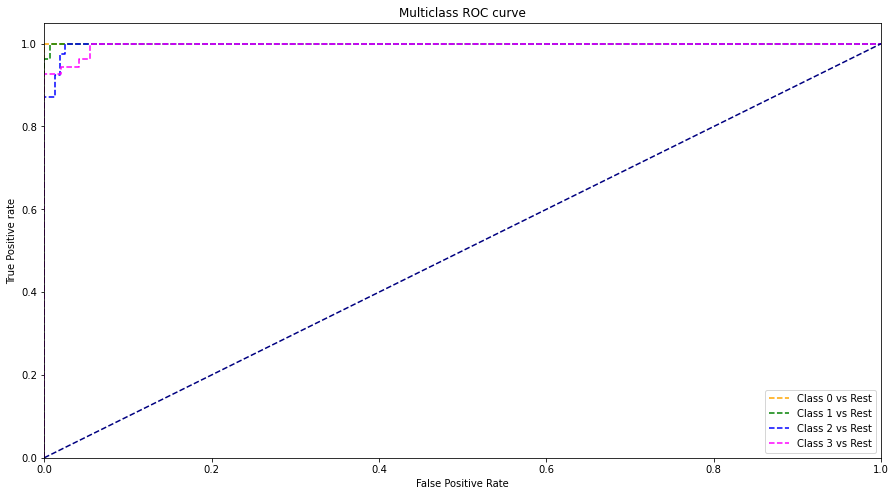

In [218]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_pred[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [219]:
# feature importance
importance = dict(zip(feature_cols.columns, model.feature_importances_))
importance

{'receipt_status': 0.030378226,
 'Contract_is_erc20': 0.0045310757,
 'trace_from_address': 0.15009484,
 'trace_to_address': 0.0032320467,
 'trace_value': 0.0021692587,
 'trace_gas': 0.0065674293,
 'trace_gas_used': 0.0048583066,
 'token_transfer_from_address': 0.0025634374,
 'token_transfer_to_address': 0.00675521,
 'token_transfer_value': 0.004201528,
 'transaction_from_address': 0.008484627,
 'transaction_to_address': 0.010803601,
 'transaction_value': 0.53395104,
 'transaction_gas': 0.0060804086,
 'transaction_gas_price': 0.0035989182,
 'receipt_cumulative_gas_used': 0.014200046,
 'receipt_gas_used': 0.16954002,
 'token_decimals': 0.017259829,
 'token_total_supply': 0.010379031,
 'Contract_address': 0.010351092}

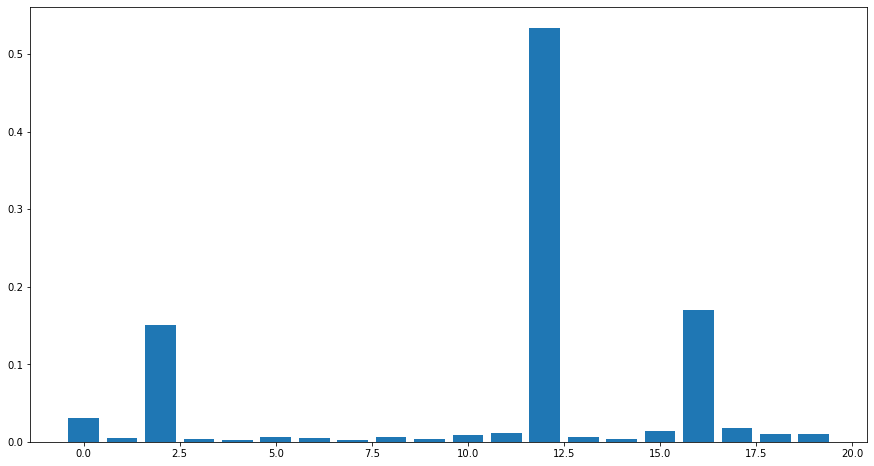

In [220]:
# plot
plt.subplots(figsize=(15,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()